<a href="https://colab.research.google.com/github/Bintang-Satwika/IMBD_EDA/blob/main/Titisan_Orang_Sukses_Tugas_Kelompok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Genap 2022/2023

Fakultas Ilmu Komputer, Universitas Indonesia

#**Tugas Kelompok**
##**Kelompok: Titisan Orang Sukses - KASDAD A**

##**Dataset: IMDB _Parental Guide_**
</center>

## Dataset

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Import data
df = pd.read_csv('https://raw.githubusercontent.com/determinedguy/aids-dataset-even-2023/main/project/imdbparentalguide_rev01.csv')
df

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,totalRuntime,genres,episodes,averageRating,numVotes,sex,violence,profanity,drugs,intense,mpaa
0,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,142.0,142.0,Drama,1,9.3,2684158,Mild,Moderate,Severe,Mild,Moderate,Rated R
1,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,152.0,152.0,"Action,Crime,Drama",1,9.0,2657541,None,Moderate,Mild,Mild,Severe,Rated PG-13
2,tt1375666,movie,Inception,Inception,0,2010,148.0,148.0,"Action,Adventure,Sci-Fi",1,8.8,2357063,None,Moderate,Mild,Mild,Moderate,Rated PG-13
3,tt0137523,movie,Fight Club,Fight Club,0,1999,139.0,139.0,Drama,1,8.8,2129710,Moderate,Severe,Severe,Moderate,Severe,Rated R
4,tt0109830,movie,Forrest Gump,Forrest Gump,0,1994,142.0,142.0,"Drama,Romance",1,8.8,2083211,Moderate,Moderate,Moderate,Moderate,Moderate,Rated PG-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45499,tt15839646,movie,Induvadana,Induvadana,0,2022,125.0,125.0,Romance,1,6.1,1001,Mild,NaN,NaN,NaN,NaN,Rated G
45500,tt3175218,video,Man,Man,0,2012,4.0,4.0,"Animation,Comedy,Horror",1,7.4,1001,None,Moderate,None,Mild,Moderate,Rated G
45501,tt3949638,movie,Power,Power,0,2014,147.0,147.0,"Action,Comedy,Crime",1,5.8,1001,NaN,NaN,NaN,NaN,NaN,Rated G
45502,tt5518128,movie,Love Games,Love Games,0,2016,114.0,114.0,"Crime,Thriller",1,4.2,1001,Mild,NaN,NaN,NaN,NaN,Rated G


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45504 entries, 0 to 45503
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          45504 non-null  object 
 1   titleType       45504 non-null  object 
 2   primaryTitle    45504 non-null  object 
 3   originalTitle   45504 non-null  object 
 4   isAdult         45504 non-null  int64  
 5   startYear       45504 non-null  int64  
 6   runtimeMinutes  45504 non-null  float64
 7   totalRuntime    45504 non-null  float64
 8   genres          45504 non-null  object 
 9   episodes        45504 non-null  int64  
 10  averageRating   45504 non-null  float64
 11  numVotes        45504 non-null  int64  
 12  sex             29923 non-null  object 
 13  violence        27497 non-null  object 
 14  profanity       26901 non-null  object 
 15  drugs           26390 non-null  object 
 16  intense         26038 non-null  object 
 17  mpaa            45504 non-null 

In [ ]:
print("Count missing values untuk dataframe:\n", df.isnull().sum())

Count missing values untuk dataframe:
 tconst                0
titleType             0
primaryTitle          0
originalTitle         0
isAdult               0
startYear             0
runtimeMinutes        0
totalRuntime          0
genres                0
episodes              0
averageRating         0
numVotes              0
sex               15581
violence          18007
profanity         18603
drugs             19114
intense           19466
mpaa                  0
dtype: int64


## Eksplorasi dan Analisis

### 1. Berapa rating rata-rata film untuk setiap `titleType` (tipe film)?

In [ ]:
df[['titleType']].value_counts()

titleType   
movie           34154
tvSeries         5885
tvMovie          2210
tvMiniSeries     1187
video            1152
videoGame         604
tvSpecial         312
dtype: int64

In [ ]:
title_type_mean = df.groupby('titleType')['averageRating'].mean().sort_values(ascending=False)
title_type_mean.to_frame()

,averageRating
titleType,
videoGame,7.999669
tvMiniSeries,7.403538
tvSpecial,7.321474
tvSeries,7.212676
movie,6.299725
tvMovie,6.190090
video,5.612674


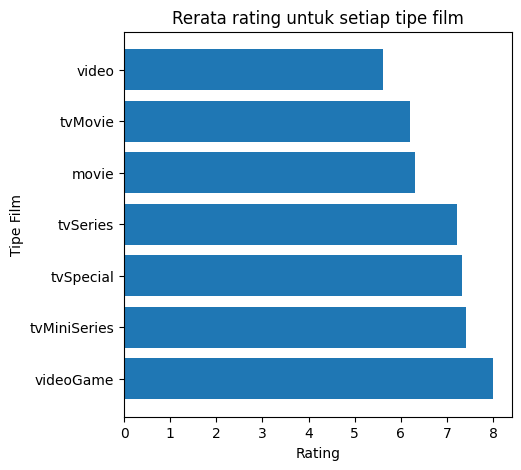

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.barh(title_type_mean.index, title_type_mean)
plt.xlabel('Rating')
plt.ylabel('Tipe Film')
plt.title('Rerata rating untuk setiap tipe film')
plt.show()

### 2. Apa ciri-ciri dari film yang memiliki MPAA `Rated PG`?

In [ ]:
df[['mpaa']].value_counts()

mpaa       
Rated G        32534
Rated R         8000
Rated PG-13     3333
Rated PG        1597
Rated NC-17       40
dtype: int64

Summary statistics for runtimeMinutes:
count    1597.000000
mean      100.446462
std        25.062387
min        38.000000
25%        90.000000
50%        97.000000
75%       107.000000
max       778.000000
Name: runtimeMinutes, dtype: float64

Summary statistics for averageRating:
count    1597.000000
mean        6.117470
std         1.198909
min         1.300000
25%         5.400000
50%         6.300000
75%         7.000000
max         9.200000
Name: averageRating, dtype: float64

Summary statistics for isAdult:
count    1597.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: isAdult, dtype: float64

Summary statistics for numVotes:
count    1.597000e+03
mean     5.391768e+04
std      1.202170e+05
min      1.002000e+03
25%      3.246000e+03
50%      1.184800e+04
75%      4.678900e+04
max      1.367225e+06
Name: numVotes, dtype: float64

Summary statistics for episodes:
count    1597.000000
mean        1.040075
std  

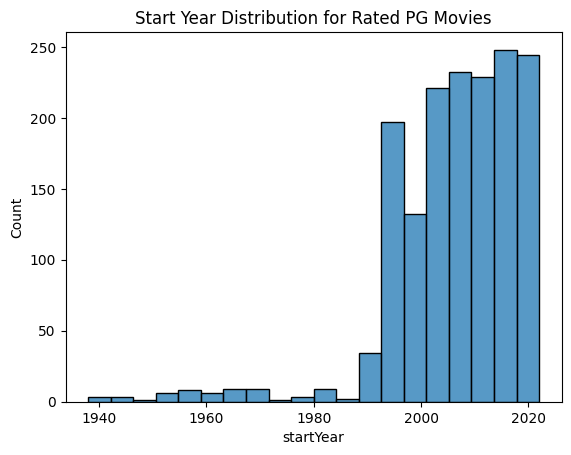

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


pg_movies = df[df['mpaa'] == 'Rated PG']
r_movies = df[df['mpaa'] == 'Rated R']
pg13_movies = df[df['mpaa'] == 'Rated PG-13']
nc17_movies = df[df['mpaa'] == 'Rated NC-17']
g_movies = df[df['mpaa'] == 'Rated G']


print("Summary statistics for runtimeMinutes:")
print(pg_movies['runtimeMinutes'].describe())

print("\nSummary statistics for averageRating:")
print(pg_movies['averageRating'].describe())

print("\nSummary statistics for isAdult:")
print(pg_movies['isAdult'].describe())

print("\nSummary statistics for numVotes:")
print(pg_movies['numVotes'].describe())

print("\nSummary statistics for episodes:")
print(pg_movies['episodes'].describe())

print("\nSummary statistics for episodes:")
print(g_movies['episodes'].describe())

sns.histplot(pg_movies['startYear'], bins=20)
plt.title("Start Year Distribution for Rated PG Movies")
plt.show()


**FITUR KUANTITATIF**

In [ ]:
print(pg_movies['runtimeMinutes'].mean())
print(r_movies['runtimeMinutes'].mean())
print(pg13_movies['runtimeMinutes'].mean())
print(nc17_movies['runtimeMinutes'].mean())
print(g_movies['runtimeMinutes'].mean())

100.44646211646838
102.681125
106.6978697869787
109.475
95.28965652448977


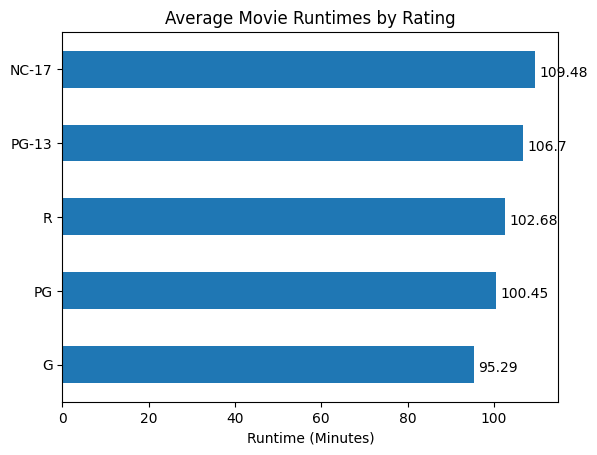

In [ ]:
means = [g_movies['runtimeMinutes'].mean(),
         pg_movies['runtimeMinutes'].mean(),
         r_movies['runtimeMinutes'].mean(),
         pg13_movies['runtimeMinutes'].mean(),
         nc17_movies['runtimeMinutes'].mean()]

labels = ['G', 'PG', 'R', 'PG-13', 'NC-17']

ax = plt.gca()
chart = pd.Series(means, index=labels).plot(kind='barh', ax=ax)

for i, v in enumerate(means):
    ax.text(v + 1, i - 0.1, str(round(v, 2)))

plt.title('Average Movie Runtimes by Rating')
plt.xlabel('Runtime (Minutes)')

plt.show()

In [ ]:
print("\nSummary statistics for averageRating:")
print(g_movies['averageRating'].mean())
print(pg_movies['averageRating'].mean())
print(r_movies['averageRating'].mean())
print(pg13_movies['averageRating'].mean())
print(nc17_movies['averageRating'].mean())


Summary statistics for averageRating:
6.631493207106412
6.11747025673137
5.916325
6.1676567656765675
6.285


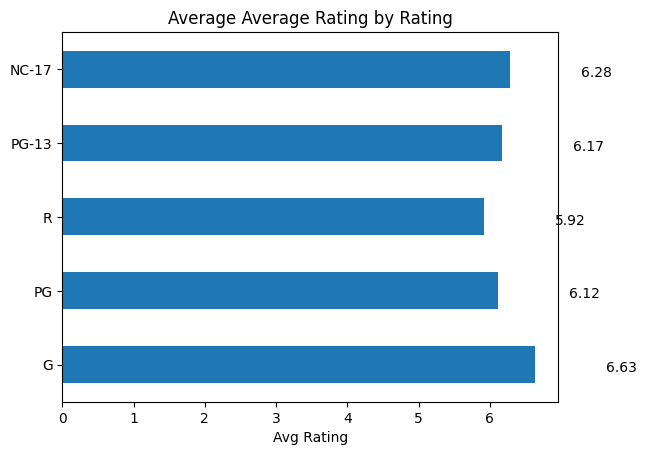

In [ ]:
means = [g_movies['averageRating'].mean(),
         pg_movies['averageRating'].mean(),
         r_movies['averageRating'].mean(),
         pg13_movies['averageRating'].mean(),
         nc17_movies['averageRating'].mean()]

labels = ['G', 'PG', 'R', 'PG-13', 'NC-17']

ax = plt.gca()
chart = pd.Series(means, index=labels).plot(kind='barh', ax=ax)

for i, v in enumerate(means):
    ax.text(v + 1, i - 0.1, str(round(v, 2)))

plt.title('Average Average Rating by Rating')
plt.xlabel('Avg Rating')

plt.show()

In [ ]:
print("\nSummary statistics for numVotes:")
print(g_movies['numVotes'].mean())
print(pg_movies['numVotes'].mean())
print(r_movies['numVotes'].mean())
print(pg13_movies['numVotes'].mean())
print(nc17_movies['numVotes'].mean())


Summary statistics for numVotes:
8436.89029937911
53917.676268002506
45454.429375
87117.24152415241
37286.95


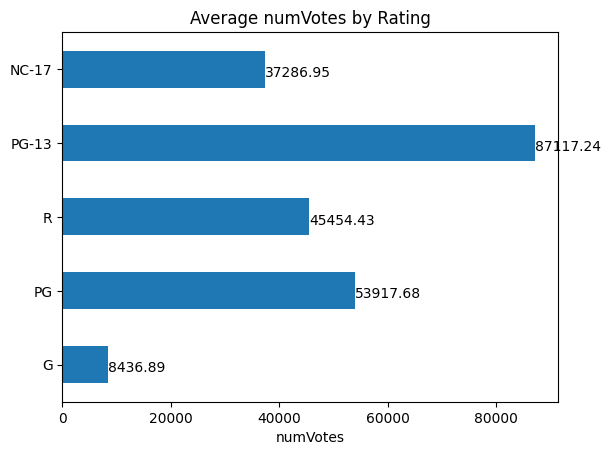

In [ ]:
means = [g_movies['numVotes'].mean(),
         pg_movies['numVotes'].mean(),
         r_movies['numVotes'].mean(),
         pg13_movies['numVotes'].mean(),
         nc17_movies['numVotes'].mean()]

labels = ['G', 'PG', 'R', 'PG-13', 'NC-17']

ax = plt.gca()
chart = pd.Series(means, index=labels).plot(kind='barh', ax=ax)

for i, v in enumerate(means):
    ax.text(v + 1, i - 0.1, str(round(v, 2)))

plt.title('Average numVotes by Rating')
plt.xlabel('numVotes')

plt.show()

In [ ]:
print("Summary statistics for episodes:")
print(g_movies['episodes'].mean())
print(pg_movies['episodes'].mean())
print(r_movies['episodes'].mean())
print(pg13_movies['episodes'].mean())
print(nc17_movies['episodes'].mean())

Summary statistics for episodes:
24.58760066392082
1.040075140889167
1.019875
1.0132013201320131
1.0


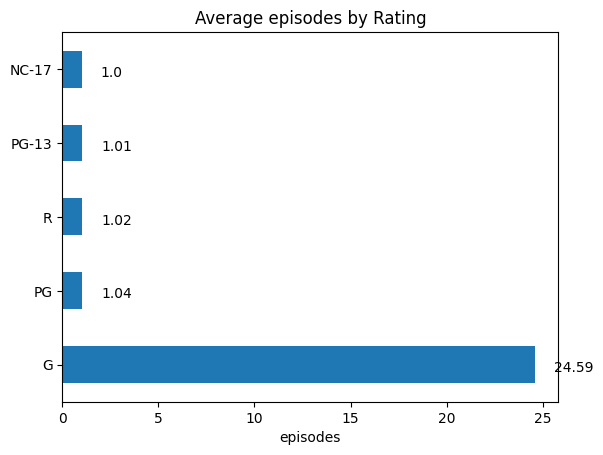

In [ ]:
means = [g_movies['episodes'].mean(),
         pg_movies['episodes'].mean(),
         r_movies['episodes'].mean(),
         pg13_movies['episodes'].mean(),
         nc17_movies['episodes'].mean()]

labels = ['G', 'PG', 'R', 'PG-13', 'NC-17']

ax = plt.gca()
chart = pd.Series(means, index=labels).plot(kind='barh', ax=ax)

for i, v in enumerate(means):
    ax.text(v + 1, i - 0.1, str(round(v, 2)))

plt.title('Average episodes by Rating')
plt.xlabel('episodes')

plt.show()

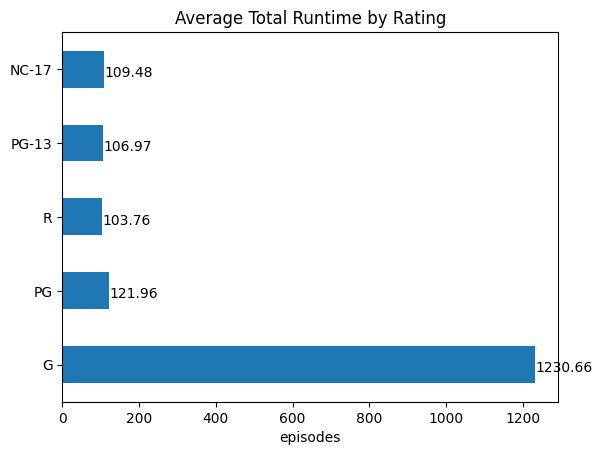

In [ ]:
means = [g_movies['totalRuntime'].mean(),
         pg_movies['totalRuntime'].mean(),
         r_movies['totalRuntime'].mean(),
         pg13_movies['totalRuntime'].mean(),
         nc17_movies['totalRuntime'].mean()]

labels = ['G', 'PG', 'R', 'PG-13', 'NC-17']

ax = plt.gca()
chart = pd.Series(means, index=labels).plot(kind='barh', ax=ax)

for i, v in enumerate(means):
    ax.text(v + 1, i - 0.1, str(round(v, 2)))

plt.title('Average Total Runtime by Rating')
plt.xlabel('episodes')

plt.show()

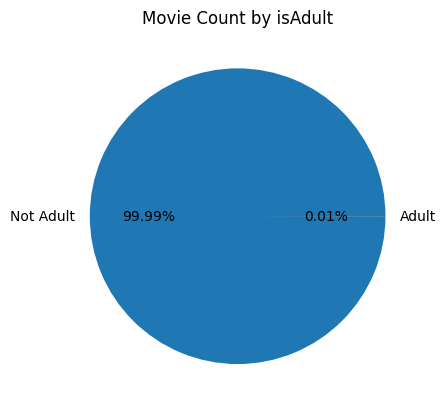

In [ ]:
# Get the count of movies with isAdult=0 and isAdult=1
adult_counts = df['isAdult'].value_counts()

# Create a pie chart
labels = ['Not Adult', 'Adult']
plt.pie(adult_counts, labels=labels, autopct='%1.2f%%')

# Add title to the chart
plt.title('Movie Count by isAdult')

# Show the chart
plt.show()

**FITUR KUALITATIF**

movie           34154
tvSeries         5885
tvMovie          2210
tvMiniSeries     1187
video            1152
videoGame         604
tvSpecial         312
Name: titleType, dtype: int64


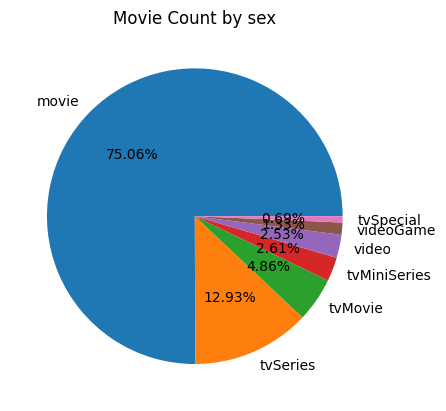

In [ ]:
title_type_counts = df['titleType'].value_counts()
print(title_type_counts)

labels = ['movie', 'tvSeries', 'tvMovie', 'tvMiniSeries', 'video', 'videoGame', 'tvSpecial']
plt.pie(title_type_counts, labels=labels, autopct='%1.2f%%')

plt.title('Movie Count by sex')

plt.show()

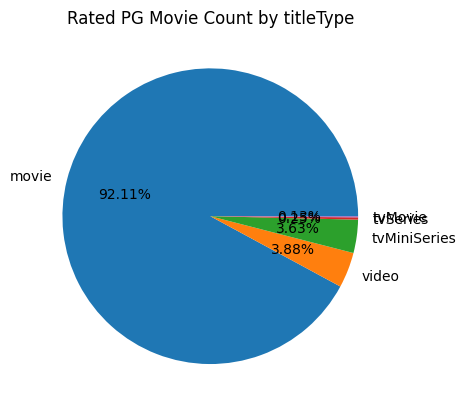

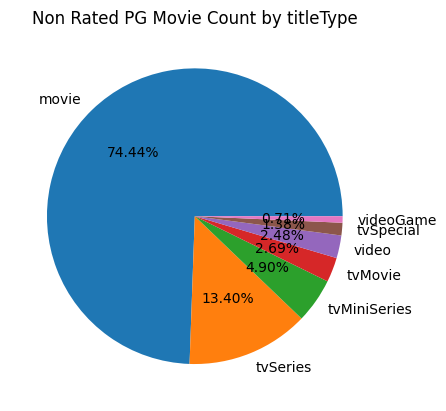

In [ ]:
rated_pg_df = df[df['mpaa'] == 'Rated PG']
rated_pg_titleType_counts = rated_pg_df['titleType'].value_counts()

labels = rated_pg_df['titleType'].unique()
plt.pie(rated_pg_titleType_counts, labels=labels, autopct='%1.2f%%')
plt.title('Rated PG Movie Count by titleType')
plt.show()

non_rated_pg_df = df[~(df['mpaa'] == 'Rated PG')]
non_rated_pg_titleType_counts = non_rated_pg_df['titleType'].value_counts()

labels = non_rated_pg_df['titleType'].unique()
plt.pie(non_rated_pg_titleType_counts, labels=labels, autopct='%1.2f%%')
plt.title('Non Rated PG Movie Count by titleType')
plt.show()

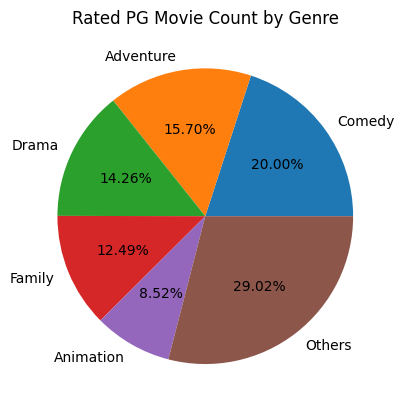

In [ ]:
rated_pg_df = df[df['mpaa'] == 'Rated PG']
rated_pg_df = rated_pg_df.assign(genres=rated_pg_df['genres'].str.split(','))
rated_pg_df = rated_pg_df.explode('genres')
rated_pg_genre_counts = rated_pg_df['genres'].value_counts()

total_movies = len(rated_pg_df)
genre_percents = rated_pg_genre_counts / total_movies

threshold = 0.08
other_genres = genre_percents[genre_percents < threshold].index.tolist()
rated_pg_genre_counts.loc['Others'] = rated_pg_genre_counts[other_genres].sum()
rated_pg_genre_counts.drop(other_genres, inplace=True)

labels = rated_pg_genre_counts.index.tolist()
plt.pie(rated_pg_genre_counts, labels=labels, autopct='%1.2f%%')
plt.title('Rated PG Movie Count by Genre')
plt.show()

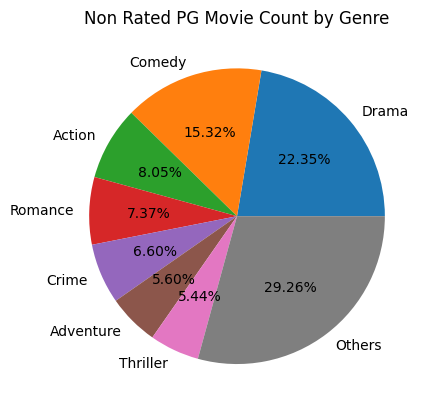

In [ ]:
rated_pg_df = df[~(df['mpaa'] == 'Rated PG')]
rated_pg_df = rated_pg_df.assign(genres=rated_pg_df['genres'].str.split(','))
rated_pg_df = rated_pg_df.explode('genres')
rated_pg_genre_counts = rated_pg_df['genres'].value_counts()

total_movies = len(rated_pg_df)
genre_percents = rated_pg_genre_counts / total_movies

threshold = 0.05
other_genres = genre_percents[genre_percents < threshold].index.tolist()
rated_pg_genre_counts.loc['Others'] = rated_pg_genre_counts[other_genres].sum()
rated_pg_genre_counts.drop(other_genres, inplace=True)

labels = rated_pg_genre_counts.index.tolist()
plt.pie(rated_pg_genre_counts, labels=labels, autopct='%1.2f%%')
plt.title('Non Rated PG Movie Count by Genre')
plt.show()

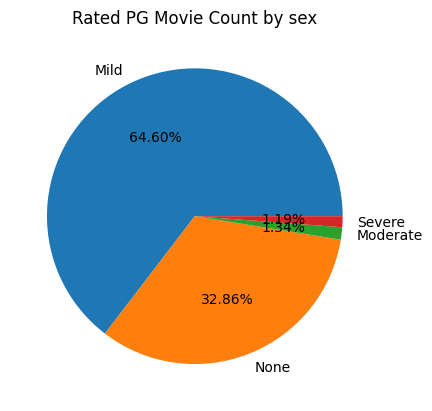

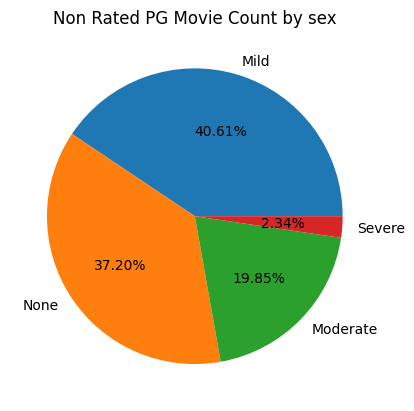

In [ ]:
# Filter the dataframe for Rated PG movies
rated_pg_df = df[df['mpaa'] == 'Rated PG']
# Get the count of movies with isAdult=0 and isAdult=1 for Rated PG movies
rated_pg_sex_counts = rated_pg_df['sex'].value_counts()

# Create a pie chart for Rated PG movies
labels = ['Mild', 'None', 'Moderate', 'Severe']
plt.pie(rated_pg_sex_counts, labels=labels, autopct='%1.2f%%')
# Add title to the chart
plt.title('Rated PG Movie Count by sex')
# Show the chart
plt.show()

# Filter the dataframe for Non Rated PG movies
non_rated_pg_df = df[~(df['mpaa'] == 'Rated PG')]
# Get the count of movies with isAdult=0 and isAdult=1 for Non Rated PG movies
non_rated_pg_sex_counts = non_rated_pg_df['sex'].value_counts()

# Create a pie chart for Non Rated PG movies
labels = ['Mild', 'None', 'Moderate', 'Severe']
plt.pie(non_rated_pg_sex_counts, labels=labels, autopct='%1.2f%%')
# Add title to the chart
plt.title('Non Rated PG Movie Count by sex')
# Show the chart
plt.show()

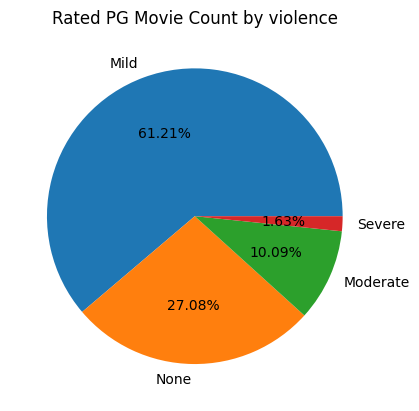

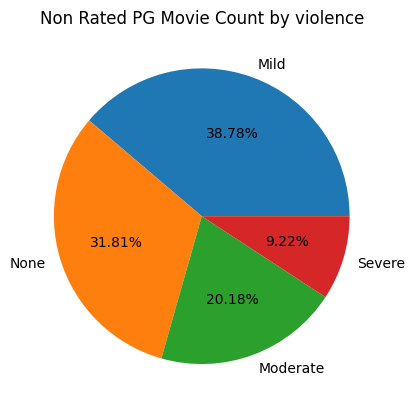

In [ ]:
# Filter the dataframe for Rated PG movies
rated_pg_df = df[df['mpaa'] == 'Rated PG']
# Get the count of movies with isAdult=0 and isAdult=1 for Rated PG movies
rated_pg_violence_counts = rated_pg_df['violence'].value_counts()

# Create a pie chart for Rated PG movies
labels = ['Mild', 'None', 'Moderate', 'Severe']
plt.pie(rated_pg_violence_counts, labels=labels, autopct='%1.2f%%')
# Add title to the chart
plt.title('Rated PG Movie Count by violence')
# Show the chart
plt.show()

# Filter the dataframe for Non Rated PG movies
non_rated_pg_df = df[~(df['mpaa'] == 'Rated PG')]
# Get the count of movies with isAdult=0 and isAdult=1 for Non Rated PG movies
non_rated_pg_violence_counts = non_rated_pg_df['violence'].value_counts()

# Create a pie chart for Non Rated PG movies
labels = ['Mild', 'None', 'Moderate', 'Severe']
plt.pie(non_rated_pg_violence_counts, labels=labels, autopct='%1.2f%%')
# Add title to the chart
plt.title('Non Rated PG Movie Count by violence')
# Show the chart
plt.show()

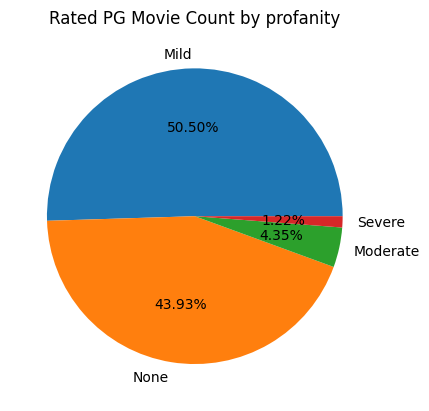

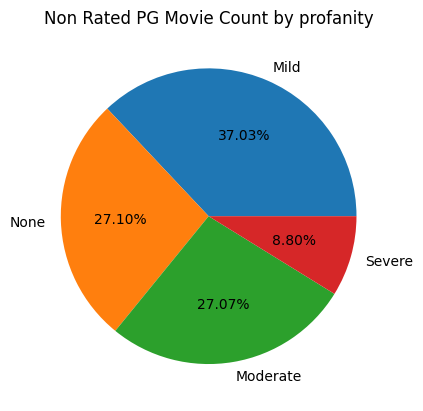

In [ ]:
# Filter the dataframe for Rated PG movies
rated_pg_df = df[df['mpaa'] == 'Rated PG']
# Get the count of movies with isAdult=0 and isAdult=1 for Rated PG movies
rated_pg_violence_counts = rated_pg_df['profanity'].value_counts()

# Create a pie chart for Rated PG movies
labels = ['Mild', 'None', 'Moderate', 'Severe']
plt.pie(rated_pg_violence_counts, labels=labels, autopct='%1.2f%%')
# Add title to the chart
plt.title('Rated PG Movie Count by profanity')
# Show the chart
plt.show()

# Filter the dataframe for Non Rated PG movies
non_rated_pg_df = df[~(df['mpaa'] == 'Rated PG')]
# Get the count of movies with isAdult=0 and isAdult=1 for Non Rated PG movies
non_rated_pg_violence_counts = non_rated_pg_df['profanity'].value_counts()

# Create a pie chart for Non Rated PG movies
labels = ['Mild', 'None', 'Moderate', 'Severe']
plt.pie(non_rated_pg_violence_counts, labels=labels, autopct='%1.2f%%')
# Add title to the chart
plt.title('Non Rated PG Movie Count by profanity')
# Show the chart
plt.show()

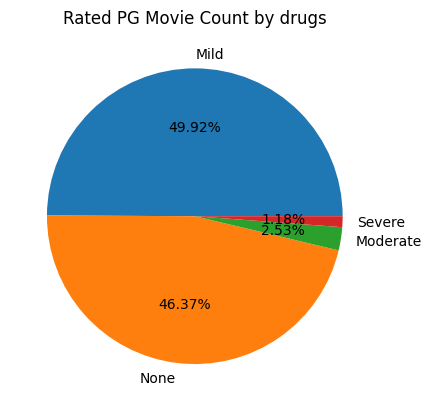

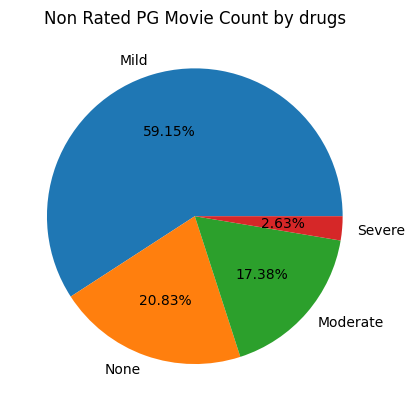

In [ ]:
# Filter the dataframe for Rated PG movies
rated_pg_df = df[df['mpaa'] == 'Rated PG']
# Get the count of movies with isAdult=0 and isAdult=1 for Rated PG movies
rated_pg_drugs_counts = rated_pg_df['drugs'].value_counts()

# Create a pie chart for Rated PG movies
labels = ['Mild', 'None', 'Moderate', 'Severe']
plt.pie(rated_pg_drugs_counts, labels=labels, autopct='%1.2f%%')
# Add title to the chart
plt.title('Rated PG Movie Count by drugs')
# Show the chart
plt.show()

# Filter the dataframe for Non Rated PG movies
non_rated_pg_df = df[~(df['mpaa'] == 'Rated PG')]
# Get the count of movies with isAdult=0 and isAdult=1 for Non Rated PG movies
non_rated_pg_drugs_counts = non_rated_pg_df['drugs'].value_counts()

# Create a pie chart for Non Rated PG movies
labels = ['Mild', 'None', 'Moderate', 'Severe']
plt.pie(non_rated_pg_drugs_counts, labels=labels, autopct='%1.2f%%')
# Add title to the chart
plt.title('Non Rated PG Movie Count by drugs')
# Show the chart
plt.show()

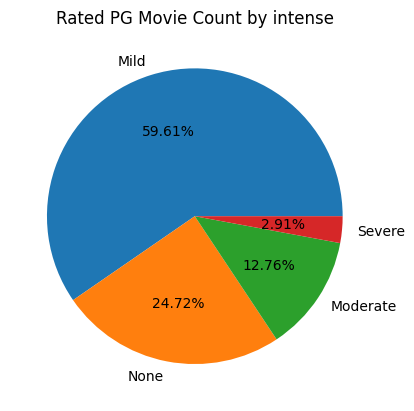

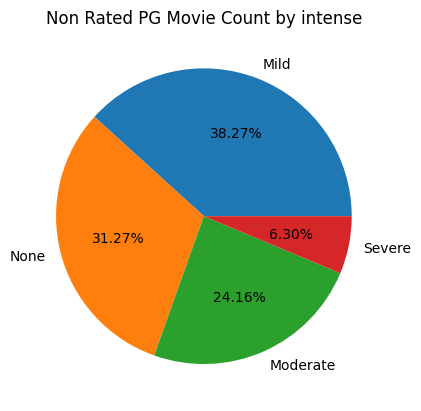

In [ ]:
# Filter the dataframe for Rated PG movies
rated_pg_df = df[df['mpaa'] == 'Rated PG']
# Get the count of movies with isAdult=0 and isAdult=1 for Rated PG movies
rated_pg_intense_counts = rated_pg_df['intense'].value_counts()

# Create a pie chart for Rated PG movies
labels = ['Mild', 'None', 'Moderate', 'Severe']
plt.pie(rated_pg_intense_counts, labels=labels, autopct='%1.2f%%')
# Add title to the chart
plt.title('Rated PG Movie Count by intense')
# Show the chart
plt.show()

# Filter the dataframe for Non Rated PG movies
non_rated_pg_df = df[~(df['mpaa'] == 'Rated PG')]
# Get the count of movies with isAdult=0 and isAdult=1 for Non Rated PG movies
non_rated_pg_intense_counts = non_rated_pg_df['intense'].value_counts()

# Create a pie chart for Non Rated PG movies
labels = ['Mild', 'None', 'Moderate', 'Severe']
plt.pie(non_rated_pg_intense_counts, labels=labels, autopct='%1.2f%%')
# Add title to the chart
plt.title('Non Rated PG Movie Count by intense')
# Show the chart
plt.show()

### 3. Apakah terdapat hubungan antara `sex` dengan `mpaa`?

In [ ]:
imdb = pd.read_csv('https://raw.githubusercontent.com/determinedguy/aids-dataset-even-2023/main/project/imdbparentalguide_rev01.csv')
crosstab    = pd.crosstab(imdb['mpaa'], imdb['sex'])
sort_mpaa   =  ['Rated G','Rated PG','Rated PG-13','Rated R', 'Rated NC-17']
sort_sex    = ['None', 'Mild', 'Moderate', 'Severe']
crosstab    = crosstab.reindex(sort_mpaa, axis="index")
crosstab    = crosstab.reindex(sort_sex, axis="columns")
crosstab

sex,None,Mild,Moderate,Severe
mpaa,,,,
Rated G,8299,7219,2959,0
Rated PG,865,440,18,16
Rated PG-13,981,1611,329,18
Rated R,1353,2775,2377,623
Rated NC-17,0,2,10,28


In [ ]:
# convert frekuensi ke percent
crosstab_percent = crosstab.apply(lambda x: x/x.sum(), axis=1)
crosstab_percent

sex,None,Mild,Moderate,Severe
mpaa,,,,
Rated G,0.449153,0.390702,0.160145,0.000000
Rated PG,0.646004,0.328603,0.013443,0.011949
Rated PG-13,0.333787,0.548146,0.111943,0.006125
Rated R,0.189815,0.389310,0.333474,0.087402
Rated NC-17,0.000000,0.050000,0.250000,0.700000


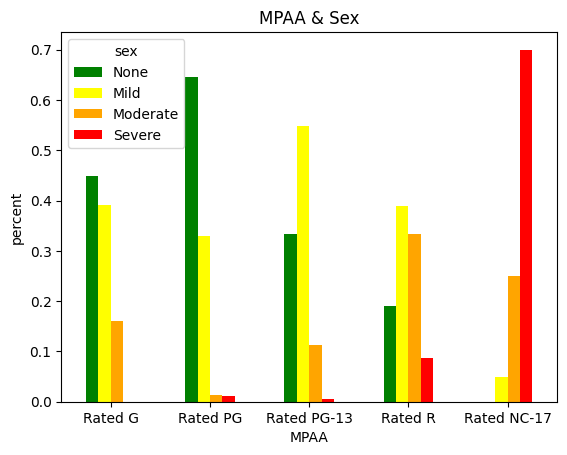

In [ ]:
import matplotlib.pyplot as plt
ax = crosstab_percent.plot(kind='bar', color=('green', 'yellow', 'orange', 'red') )
ax.set_xlabel('MPAA')
plt.xticks(rotation=0)
ax.set_ylabel('percent')
ax.set_title('MPAA & Sex')
plt.show()

In [ ]:
print('Modus tiap MPAA berdasarkan level sex adalah sebagai berikut:')
crosstab.idxmax(axis=1)

Modus tiap MPAA berdasarkan level sex adalah sebagai berikut:


mpaa
Rated G          None
Rated PG         None
Rated PG-13      Mild
Rated R          Mild
Rated NC-17    Severe
dtype: object

<Axes: >

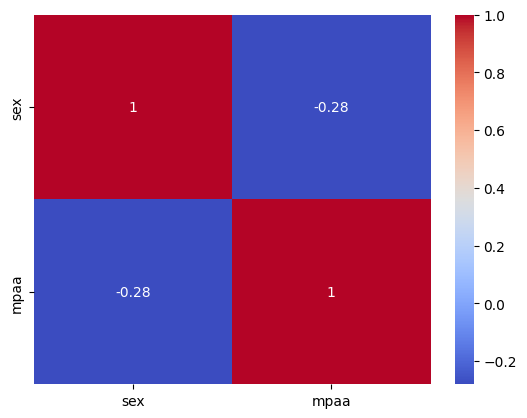

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dummy=imdb.copy()
dummy['sex'] = le.fit_transform(dummy['sex'])
dummy['mpaa'] = le.fit_transform(dummy['mpaa'])
corr = dummy[['sex', 'mpaa']].corr(method='spearman')
# Plot heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')

### 4. Apakah film yang memiliki genre Documentary memiliki rating yang lebih tinggi daripada film dengan genre lainnya?

In [ ]:
imdb = pd.read_csv('https://raw.githubusercontent.com/determinedguy/aids-dataset-even-2023/main/project/imdbparentalguide_rev01.csv')
documentary     = imdb[imdb['genres'].str.contains('Documentary')]
non_documentary = imdb[imdb['genres'].str.contains('Documentary')== False]

In [ ]:
print("rata-rata rating genre documentary: %f"%documentary['averageRating'].mean())
print("rata-rata rating genre selain documentary: %f"%non_documentary['averageRating'].mean())

rata-rata rating genre documentary: 7.380348
rata-rata rating genre selain documentary: 6.397614


In [ ]:
imdb['genre']     =imdb['genres'].str.split(',')
imdb_genre        =imdb.explode('genre')
genre_ratings     =imdb_genre[['genre', 'averageRating']]
genre_ratings     = genre_ratings.groupby(['genre']).mean()
genre_ratings     =genre_ratings.sort_values(by=['averageRating'], ascending=False)
genre_ratings

,averageRating
genre,
Short,7.412605
Documentary,7.380348
History,7.034145
News,7.001282
Biography,6.976554
Film-Noir,6.958869
Game-Show,6.924242
War,6.923295
Animation,6.909292


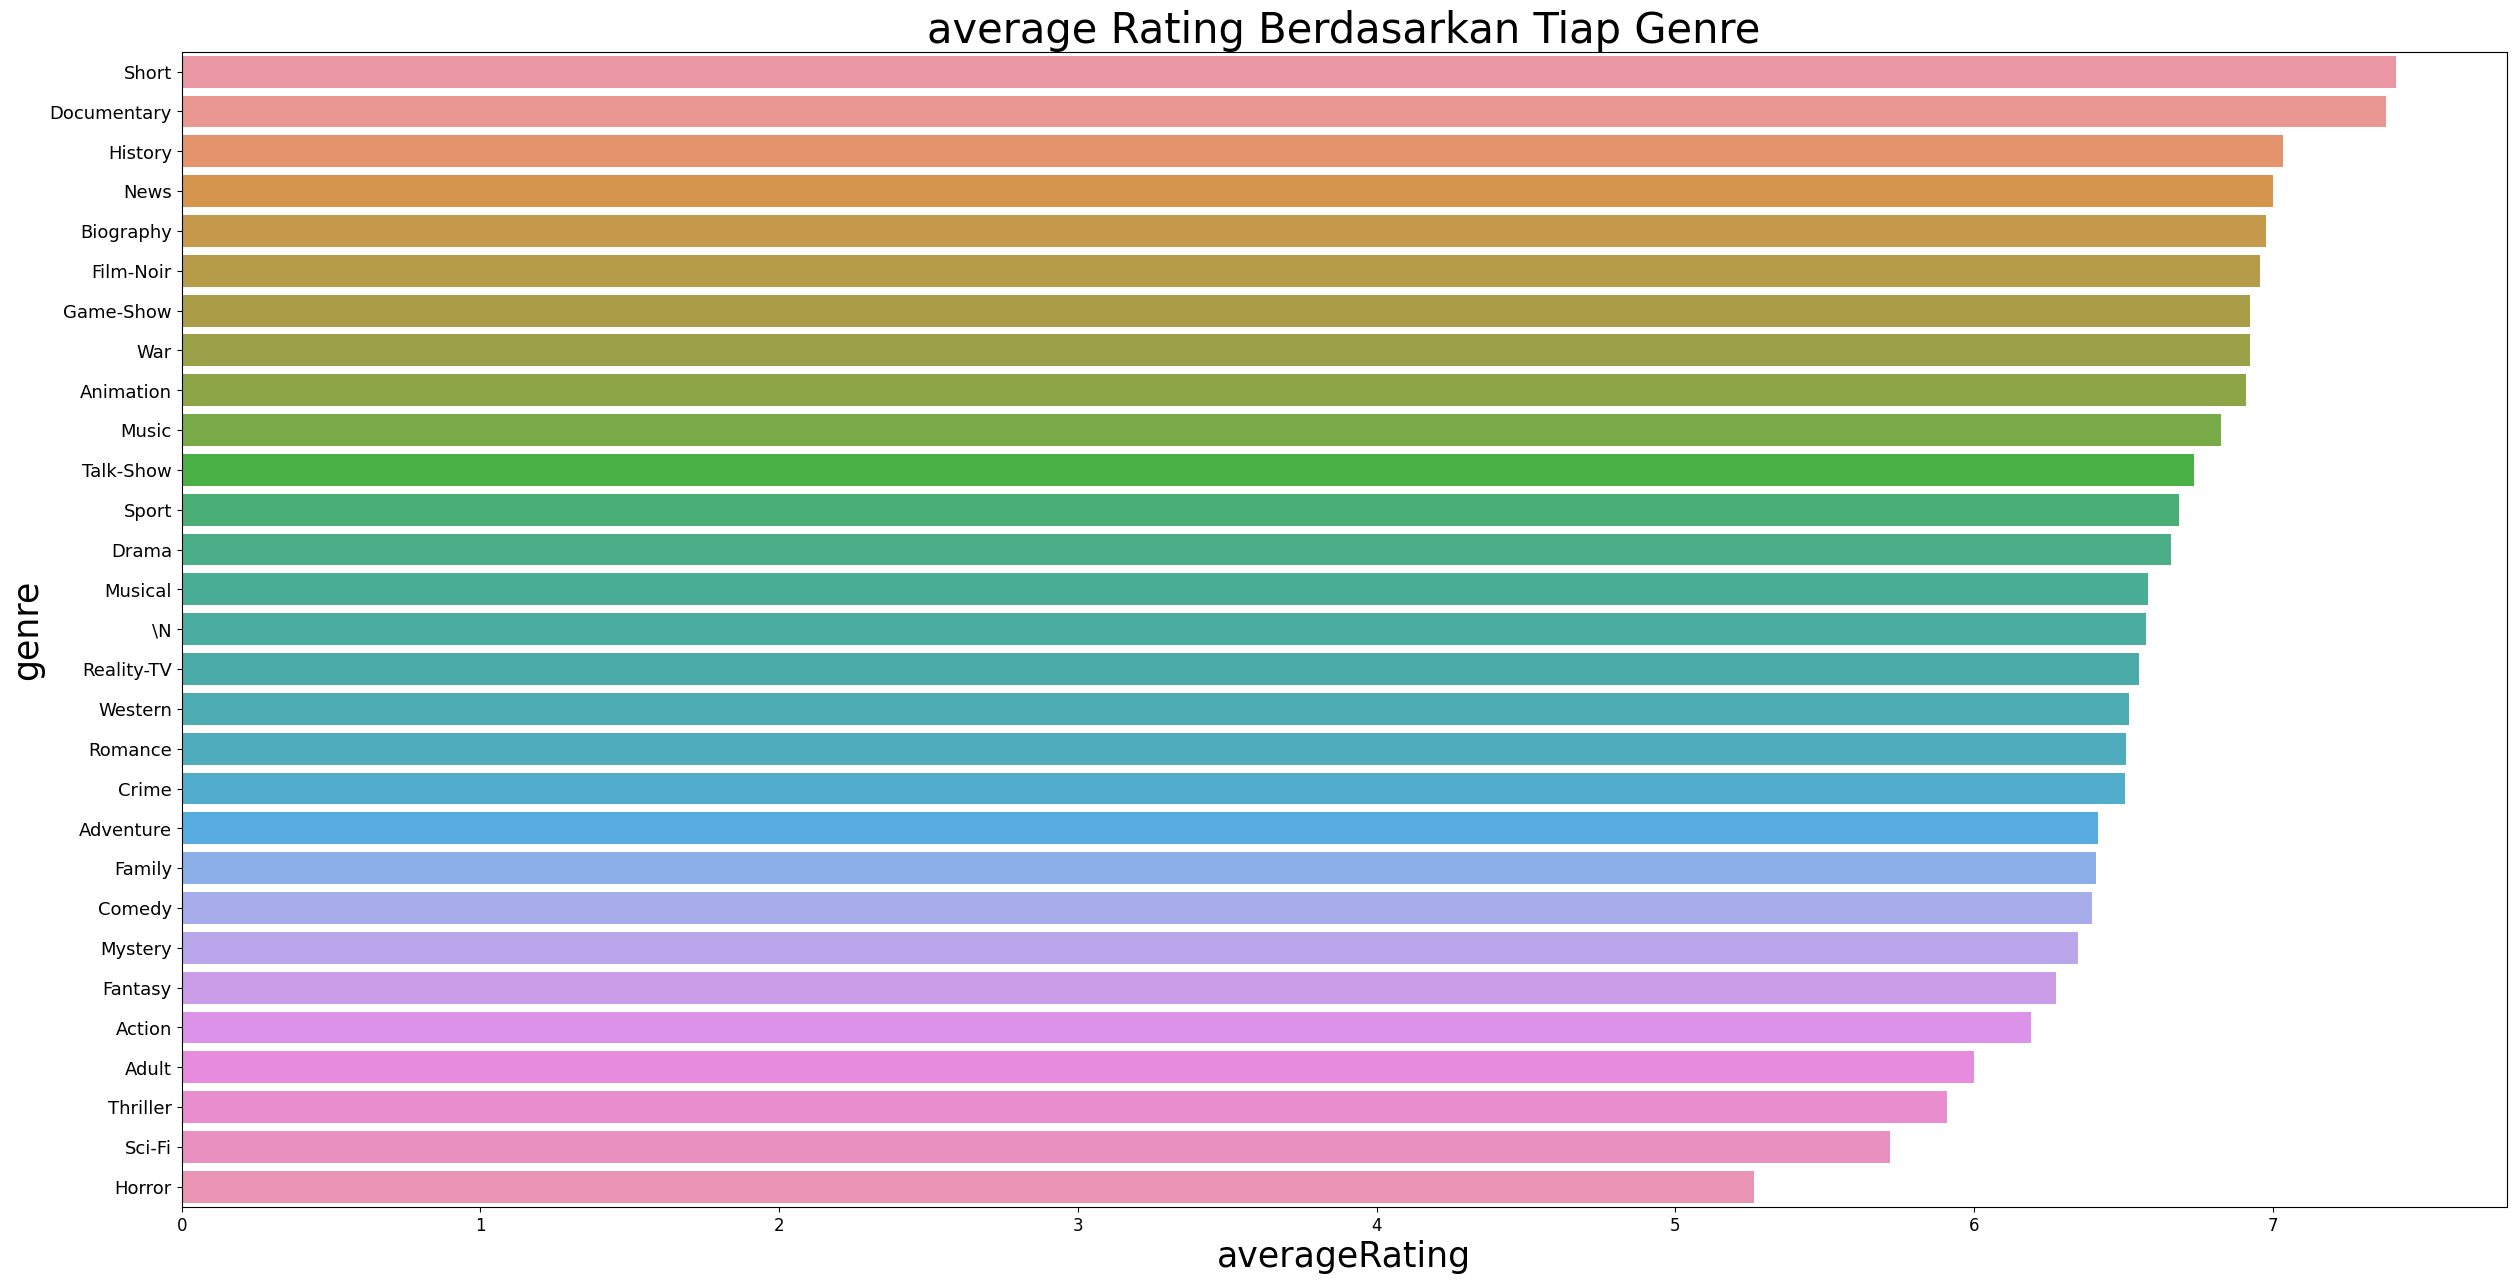

In [ ]:
plt.figure(figsize=(30,15))
plt.xticks(size=12)
plt.yticks(size=13)
barplot=sns.barplot(data=genre_ratings, x='averageRating', y=genre_ratings.index)
barplot.set_xlabel('averageRating', fontsize=25)
barplot.set_ylabel('genre', fontsize=25)
barplot.set_title('average Rating Berdasarkan Tiap Genre', fontsize=30)
plt.show()

## Eksplorasi Tambahan (Mandiri)

### 1. Apa ciri-ciri dari film yang memiliki *average rating* `>= 9.5`?

### 2. Apa tren yang dimiliki oleh film yang mulai tayang pada tahun 2022?

In [ ]:
df_2022 = df[df['startYear']==2022]
df_2022

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,totalRuntime,genres,episodes,averageRating,numVotes,sex,violence,profanity,drugs,intense,mpaa
170,tt1877830,movie,The Batman,The Batman,0,2022,176.000000,176.000000,"Action,Crime,Drama",1,7.8,653151,Mild,Moderate,Moderate,Moderate,Severe,Rated PG-13
297,tt1745960,movie,Top Gun: Maverick,Top Gun: Maverick,0,2022,130.000000,130.000000,"Action,Drama",1,8.3,489140,None,Mild,Moderate,Mild,Moderate,Rated PG-13
386,tt9419884,movie,Doctor Strange in the Multiverse of Madness,Doctor Strange in the Multiverse of Madness,0,2022,126.000000,126.000000,"Action,Adventure,Fantasy",1,6.9,417772,None,Moderate,Mild,None,Severe,Rated PG-13
538,tt10648342,movie,Thor: Love and Thunder,Thor: Love and Thunder,0,2022,118.000000,118.000000,"Action,Adventure,Comedy",1,6.3,332892,Mild,Moderate,Mild,None,Mild,Rated PG-13
605,tt7631058,tvSeries,The Lord of the Rings: The Rings of Power,The Lord of the Rings: The Rings of Power,0,2022,77.627687,698.649184,"Action,Adventure,Drama",9,6.9,310222,None,Moderate,Mild,None,Moderate,Rated G
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45394,tt22486094,movie,Ori Devuda,Ori Devuda,0,2022,143.000000,143.000000,"Comedy,Drama,Romance",1,7.2,1001,NaN,NaN,NaN,NaN,NaN,Rated G
45426,tt9805678,tvMiniSeries,Frozen Planet II,Frozen Planet II,0,2022,57.000000,57.000000,Documentary,7,9.1,1004,None,Mild,None,None,Mild,Rated G
45440,tt19398068,tvMiniSeries,Blood Sisters,Blood Sisters,0,2022,224.000000,224.000000,"Crime,Drama,Thriller",4,5.6,1002,Mild,NaN,Moderate,NaN,NaN,Rated G
45474,tt21430316,movie,Mei Hoom Moosa,Mei Hoom Moosa,0,2022,138.000000,138.000000,Drama,1,5.9,1002,NaN,NaN,NaN,NaN,NaN,Rated G


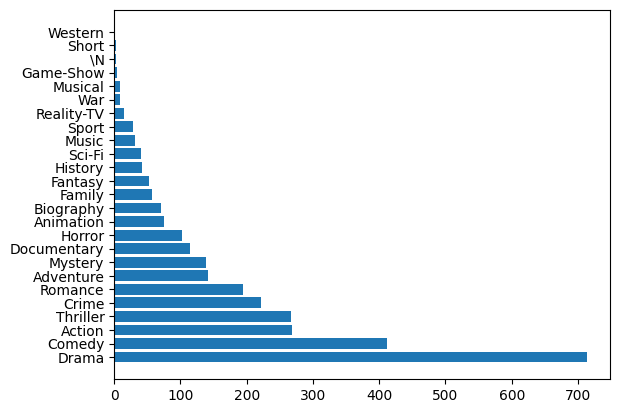

In [ ]:
df_2022_genres = df_2022['genres'].str.split(',').explode('genres').value_counts()
plt.barh(df_2022_genres.index, df_2022_genres)
plt.show()

In [ ]:
df_2022_intense = df_2022.intense.value_counts()

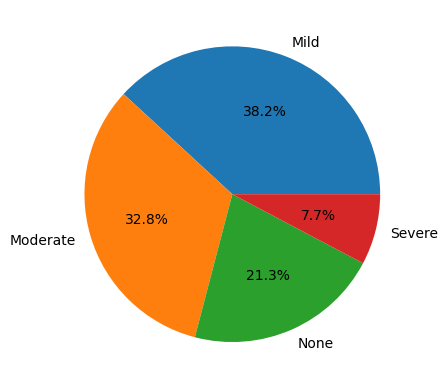

In [ ]:
plt.pie(df_2022_intense, labels=df_2022_intense.index, autopct='%1.1f%%')
plt.show()

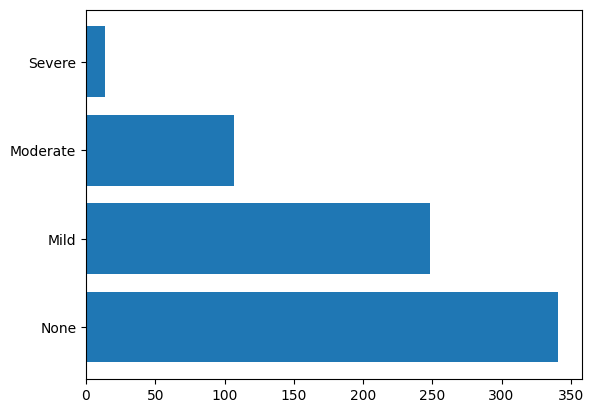

In [ ]:
df_2022_sex = df_2022.sex.value_counts()
plt.barh(df_2022_sex.index, df_2022_sex)
plt.show()

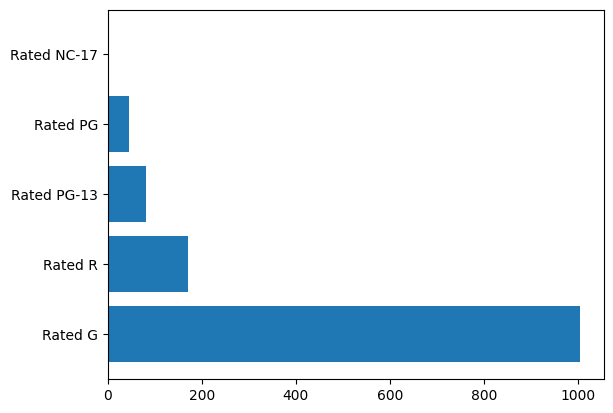

In [ ]:
df_2022_mpaa = df_2022['mpaa'].str.split(',').explode('mpaa').value_counts()
plt.barh(df_2022_mpaa.index, df_2022_mpaa)
plt.show()

In [ ]:
#df_22_trend = df_2022.nlargest(50,"numVotes")

In [ ]:
#sns.barplot(data=df_22_trend.nlargest(10,"numVotes"),y='originalTitle',x='numVotes')

In [ ]:
# df_split = pd.DataFrame()

# for val in set(df_22_trend['genres'].str.split(',').sum()):

#     df_split[val] = 0

#     for index, row in df_22_trend.iterrows():

#         if val in row['genres']:
#             df_split.at[index, val] = 1

In [ ]:
# df_split_trend = df_split.fillna(0)

In [ ]:
# (df_split_trend.sum()*2).sort_values().plot(kind='barh')
# plt.xlabel('percentage of top 50')

## Preprocessing

In [ ]:
# Import data
df = pd.read_csv('https://raw.githubusercontent.com/determinedguy/aids-dataset-even-2023/main/project/imdbparentalguide_rev01.csv')

In [ ]:
# Fungsi untuk mengecek missing value
def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=False)
    percent = col_na / len(df) * 100

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data[missing_data['Total'] > 0])

cek_null(df)

           Total    Percent
intense    19466  42.778657
drugs      19114  42.005098
profanity  18603  40.882120
violence   18007  39.572345
sex        15581  34.240946


In [ ]:
fill_imdb=df.copy()
# RATED G
syarat=(imdb['mpaa']=='Rated G')
kolom=['sex', 'violence', 'drugs', 'profanity', 'intense']
modus =fill_imdb.loc[syarat, kolom].mode().iloc[0]
display(modus)
fill_imdb.loc[syarat, kolom] = fill_imdb.loc[syarat, kolom].fillna(modus)

sex          None
violence     Mild
drugs        Mild
profanity    Mild
intense      Mild
Name: 0, dtype: object

In [ ]:
#RATED PG
syarat=(imdb['mpaa']=='Rated PG')
modus =fill_imdb.loc[syarat, kolom].mode().iloc[0]
display(modus)
fill_imdb.loc[syarat, kolom] = fill_imdb.loc[syarat, kolom].fillna(modus)

sex          None
violence     Mild
drugs        Mild
profanity    Mild
intense      Mild
Name: 0, dtype: object

In [ ]:
#RATED PG-13
syarat=(imdb['mpaa']=='Rated PG-13')
modus =fill_imdb.loc[syarat, kolom].mode().iloc[0]
display(modus)
fill_imdb.loc[syarat, kolom] = fill_imdb.loc[syarat, kolom].fillna(modus)

sex          Mild
violence     Mild
drugs        Mild
profanity    Mild
intense      Mild
Name: 0, dtype: object

In [ ]:
#RATED R
syarat=(imdb['mpaa']=='Rated R')
modus =fill_imdb.loc[syarat, kolom].mode().iloc[0]
display(modus)
fill_imdb.loc[syarat, kolom] = fill_imdb.loc[syarat, kolom].fillna(modus)

sex              Mild
violence       Severe
drugs            Mild
profanity    Moderate
intense      Moderate
Name: 0, dtype: object

In [ ]:
#RATED NC-17
syarat=(imdb['mpaa']=='Rated NC-17')
modus =fill_imdb.loc[syarat, kolom].mode().iloc[0]
display(modus)
fill_imdb.loc[syarat, kolom] = fill_imdb.loc[syarat, kolom].fillna(modus)

sex            Severe
violence       Severe
drugs        Moderate
profanity      Severe
intense        Severe
Name: 0, dtype: object

In [ ]:
fill_imdb.isnull().sum()

tconst            0
titleType         0
primaryTitle      0
originalTitle     0
isAdult           0
startYear         0
runtimeMinutes    0
totalRuntime      0
genres            0
episodes          0
averageRating     0
numVotes          0
sex               0
violence          0
profanity         0
drugs             0
intense           0
mpaa              0
dtype: int64

In [ ]:
df=fill_imdb

<Axes: xlabel='mpaa', ylabel='count'>

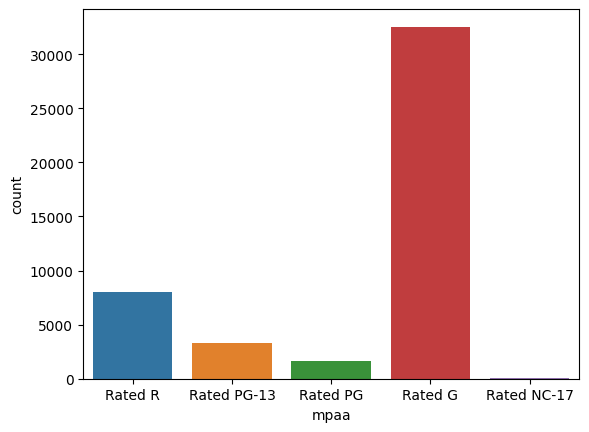

In [ ]:
display(sns.countplot(x='mpaa',data=df))

## Model Data

In [ ]:
import numpy as np
import pandas as pd
df= pd.read_csv('https://raw.githubusercontent.com/determinedguy/aids-dataset-even-2023/main/project/imdbparentalguide_rev01_filled.csv')

### 1. Buatlah model untuk mengklasifikasi usia (MPAA) dari suatu judul!

In [ ]:
datamap             = {"None":0, "Mild":1, "Moderate":2, 'Severe':3}
mpaa_map             = {"Rated G":0, "Rated PG":1, "Rated PG-13":2, 'Rated R':3, 'Rated NC-17':4}
df_map              = df.copy()
df_map['sex']       =df_map['sex'].map(datamap)
df_map['violence']  =df_map['violence'].map(datamap)
df_map['profanity'] =df_map['profanity'].map(datamap)
df_map['drugs']     =df_map['drugs'].map(datamap)
df_map['intense']   =df_map['intense'].map(datamap)
df_map['mpaa']   =df_map['mpaa'].map(mpaa_map)

df_map

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,totalRuntime,genres,episodes,averageRating,numVotes,sex,violence,profanity,drugs,intense,mpaa
0,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,142.0,142.0,Drama,1,9.3,2684158,1,2,3,1,2,3
1,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,152.0,152.0,"Action,Crime,Drama",1,9.0,2657541,0,2,1,1,3,2
2,tt1375666,movie,Inception,Inception,0,2010,148.0,148.0,"Action,Adventure,Sci-Fi",1,8.8,2357063,0,2,1,1,2,2
3,tt0137523,movie,Fight Club,Fight Club,0,1999,139.0,139.0,Drama,1,8.8,2129710,2,3,3,2,3,3
4,tt0109830,movie,Forrest Gump,Forrest Gump,0,1994,142.0,142.0,"Drama,Romance",1,8.8,2083211,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45499,tt15839646,movie,Induvadana,Induvadana,0,2022,125.0,125.0,Romance,1,6.1,1001,1,1,1,1,1,0
45500,tt3175218,video,Man,Man,0,2012,4.0,4.0,"Animation,Comedy,Horror",1,7.4,1001,0,2,0,1,2,0
45501,tt3949638,movie,Power,Power,0,2014,147.0,147.0,"Action,Comedy,Crime",1,5.8,1001,0,1,1,1,1,0
45502,tt5518128,movie,Love Games,Love Games,0,2016,114.0,114.0,"Crime,Thriller",1,4.2,1001,1,1,1,1,1,0


In [ ]:
data_uji=df_map[['sex', 'violence', 'profanity', 'drugs', 'intense', 'mpaa']].copy()
data_uji

,sex,violence,profanity,drugs,intense,mpaa
0,1,2,3,1,2,3
1,0,2,1,1,3,2
2,0,2,1,1,2,2
3,2,3,3,2,3,3
4,2,2,2,2,2,2
...,...,...,...,...,...,...
45499,1,1,1,1,1,0
45500,0,2,0,1,2,0
45501,0,1,1,1,1,0
45502,1,1,1,1,1,0


In [ ]:
set_x =data_uji.drop('mpaa', axis=1)
set_y = data_uji['mpaa']

In [ ]:
data_uji['mpaa'].value_counts()

0    32534
3     8000
2     3333
1     1597
4       40
Name: mpaa, dtype: int64

In [ ]:
from sklearn.metrics import precision_score, \
    recall_score, classification_report, \
    accuracy_score, f1_score

def evaluate_classifier_performance(prediction, y_test):
    print("Matrix evaluasi")
    y_actual = pd.Series(np.array(y_test), name = "actual")
    y_pred = pd.Series(np.array(prediction), name = "prediction")
    df_confusion = pd.crosstab(y_actual, y_pred)
    display(df_confusion)
    print()
    print("Hasil Evaluasi berdasarkan classification report \n\n%s\n" % (classification_report(y_test, prediction,zero_division=0)))
    print()
    print()

    print('F1 Macro Average:', f1_score(y_test, prediction, average='macro'))
    print('F1 Micro Average:', f1_score(y_test, prediction, average='micro'))
    print('Precision Macro Average:', precision_score(y_test, prediction, average='macro',zero_division=0))
    print('Precision Micro Average:', precision_score(y_test, prediction, average='micro',zero_division=0))
    print('Recall Macro Average:', recall_score(y_test, prediction, average='macro',zero_division=0))
    print('Recall Micro Average:', recall_score(y_test, prediction, average='micro',zero_division=0))
    print()

#### Cara Standar

In [ ]:
from sklearn.model_selection import train_test_split
set_x_train, set_x_test, set_y_train, set_y_test = train_test_split(set_x, set_y, test_size=0.2, random_state=42, stratify=set_y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(criterion = 'gini')
forest.fit(set_x_train,set_y_train)
prediction = forest.predict(set_x_test)
evaluate_classifier_performance(prediction, set_y_test)

Matrix evaluasi


prediction,0,1,2,3
actual,,,,
0,6488,0,3,16
1,313,2,0,4
2,634,1,5,27
3,546,0,9,1045
4,1,0,0,7



Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      6507
           1       0.67      0.01      0.01       319
           2       0.29      0.01      0.01       667
           3       0.95      0.65      0.77      1600
           4       0.00      0.00      0.00         8

    accuracy                           0.83      9101
   macro avg       0.54      0.33      0.34      9101
weighted avg       0.79      0.83      0.78      9101




F1 Macro Average: 0.3393958143718877
F1 Micro Average: 0.8284803867706846
Precision Macro Average: 0.5448955201747242
Precision Micro Average: 0.8284803867706846
Recall Macro Average: 0.3327941823940077
Recall Micro Average: 0.8284803867706846



#### Model dengan tuning hyperparameter menggunakan GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion': ['gini', 'entropy'],
               'min_samples_split': [10, 20, 50],
               'max_depth' : [5, 10, 12, None]
               }
# mneggunakan random forest
forest = RandomForestClassifier()

grid = GridSearchCV(estimator= forest,
                   param_grid=param_grid, cv= 5)

grid.fit(set_x_train, set_y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 12, None],
                         'min_samples_split': [10, 20, 50]})

In [ ]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 20}

In [ ]:
forest_2 = RandomForestClassifier(**grid.best_params_)
forest_2.fit(set_x_train,set_y_train)
prediction_2 = forest_2.predict(set_x_test)
evaluate_classifier_performance(prediction_2, set_y_test)

Matrix evaluasi


prediction,0,1,2,3
actual,,,,
0,6493,0,0,2
1,312,1,2,7
2,651,0,2,43
3,553,1,5,1020
4,1,0,0,8



Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       0.81      1.00      0.90      6495
           1       0.50      0.00      0.01       322
           2       0.22      0.00      0.01       696
           3       0.94      0.65      0.77      1579
           4       0.00      0.00      0.00         9

    accuracy                           0.83      9101
   macro avg       0.50      0.33      0.33      9101
weighted avg       0.78      0.83      0.77      9101




F1 Macro Average: 0.3348659610653362
F1 Micro Average: 0.8258433139215472
Precision Macro Average: 0.4954556803995006
Precision Micro Average: 0.8258433139215471
Recall Macro Average: 0.3303299382977268
Recall Micro Average: 0.8258433139215471



#### Dengan Repeated Stratified K-Fold dan Borderline Smote

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import BorderlineSMOTE
from sklearn.ensemble import RandomForestClassifier
x_numpy= set_x.to_numpy()
y_numpy=set_y.to_numpy()
smote = BorderlineSMOTE()
rf = RandomForestClassifier(**grid.best_params_)
pipeline = make_pipeline(smote, rf)

rskf = RepeatedStratifiedKFold(n_splits=12, n_repeats=4, random_state=1)

# Evaluasi model menggunakan cross-validation
f1_macro = cross_val_score(pipeline, x_numpy, y_numpy, scoring='f1_macro', cv=rskf, n_jobs=-1)
f1_micro = cross_val_score(pipeline, x_numpy, y_numpy, scoring='f1_micro', cv=rskf, n_jobs=-1)
print('F1 macro Average: %.3f' %(np.mean(f1_macro)) )
print('F1 micro Average: %.3f' %(np.mean(f1_micro)) )

F1 macro Average: 0.341
F1 micro Average: 0.575


In [ ]:
for i, (train_index, test_index) in enumerate(rskf.split(x_numpy, y_numpy)):
    print(f"Fold {i+1}:")
    print(f"  Train: {len(train_index)}")
    print(f"  Test: {len(test_index)}")

Fold 1:
  Train: 41712
  Test: 3792
Fold 2:
  Train: 41712
  Test: 3792
Fold 3:
  Train: 41712
  Test: 3792
Fold 4:
  Train: 41712
  Test: 3792
Fold 5:
  Train: 41712
  Test: 3792
Fold 6:
  Train: 41712
  Test: 3792
Fold 7:
  Train: 41712
  Test: 3792
Fold 8:
  Train: 41712
  Test: 3792
Fold 9:
  Train: 41712
  Test: 3792
Fold 10:
  Train: 41712
  Test: 3792
Fold 11:
  Train: 41712
  Test: 3792
Fold 12:
  Train: 41712
  Test: 3792
Fold 13:
  Train: 41712
  Test: 3792
Fold 14:
  Train: 41712
  Test: 3792
Fold 15:
  Train: 41712
  Test: 3792
Fold 16:
  Train: 41712
  Test: 3792
Fold 17:
  Train: 41712
  Test: 3792
Fold 18:
  Train: 41712
  Test: 3792
Fold 19:
  Train: 41712
  Test: 3792
Fold 20:
  Train: 41712
  Test: 3792
Fold 21:
  Train: 41712
  Test: 3792
Fold 22:
  Train: 41712
  Test: 3792
Fold 23:
  Train: 41712
  Test: 3792
Fold 24:
  Train: 41712
  Test: 3792
Fold 25:
  Train: 41712
  Test: 3792
Fold 26:
  Train: 41712
  Test: 3792
Fold 27:
  Train: 41712
  Test: 3792
Fold 28:
 

#### Dengan Neural Network

In [ ]:
from sklearn.neural_network import MLPClassifier
model_MLP = MLPClassifier(
    solver='adam',
    activation='relu',
    early_stopping = True,
    alpha=1e-3,
    hidden_layer_sizes=(500,150, 100, 40),
    random_state=2021,
    verbose=True,
    beta_1=0.9,
    beta_2=0.9,
    learning_rate_init=0.001,
    batch_size=64,
    epsilon=1e-6,
    max_iter=300,
)

In [ ]:
set_x_train, set_x_test, set_y_train, set_y_test
model_MLP.fit(set_x_train, set_y_train)
prediksi_MLP = model_MLP.predict(set_x_test)
evaluate_classifier_performance(set_y_test, prediksi_MLP)

Iteration 1, loss = 0.59389430
Validation score: 0.822302
Iteration 2, loss = 0.53307301
Validation score: 0.825048
Iteration 3, loss = 0.52021065
Validation score: 0.828619
Iteration 4, loss = 0.51566927
Validation score: 0.828344
Iteration 5, loss = 0.51192664
Validation score: 0.829168
Iteration 6, loss = 0.51103200
Validation score: 0.828619
Iteration 7, loss = 0.50922418
Validation score: 0.828893
Iteration 8, loss = 0.50875973
Validation score: 0.825323
Iteration 9, loss = 0.50785938
Validation score: 0.828619
Iteration 10, loss = 0.50688649
Validation score: 0.825872
Iteration 11, loss = 0.50826546
Validation score: 0.829168
Iteration 12, loss = 0.50676215
Validation score: 0.829442
Iteration 13, loss = 0.50628207
Validation score: 0.828893
Iteration 14, loss = 0.50613109
Validation score: 0.826696
Iteration 15, loss = 0.50627850
Validation score: 0.828344
Iteration 16, loss = 0.50592216
Validation score: 0.829442
Iteration 17, loss = 0.50413414
Validation score: 0.828619
Iterat

prediction,0,1,2,3,4
actual,,,,,
0,6492,313,634,546,1
2,0,0,0,1,0
3,15,6,33,1053,7



Hasil Evaluasi berdasarkan classification report 

              precision    recall  f1-score   support

           0       1.00      0.81      0.90      7986
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       0.66      0.95      0.78      1114
           4       0.00      0.00      0.00         0

    accuracy                           0.83      9101
   macro avg       0.33      0.35      0.33      9101
weighted avg       0.96      0.83      0.88      9101




F1 Macro Average: 0.33437143771945704
F1 Micro Average: 0.8290297769475883
Precision Macro Average: 0.3311639580451821
Precision Micro Average: 0.8290297769475882
Recall Macro Average: 0.3516329968827855
Recall Micro Average: 0.8290297769475882



### 2. Buatlah model untuk memprediksi rata-rata rating dari suatu judul!

In [ ]:
import numpy as np
import pandas as pd
df2= pd.read_csv('https://raw.githubusercontent.com/determinedguy/aids-dataset-even-2023/main/project/imdbparentalguide_rev01_filled.csv')

In [ ]:
datamap             = {"None":0, "Mild":1, "Moderate":2, 'Severe':3}
mpaa_map             = {"Rated G":0, "Rated PG":1, "Rated PG-13":2, 'Rated R':3, 'Rated NC-17':4}
df_map              = df.copy()
df_map['sex']       =df_map['sex'].map(datamap)
df_map['violence']  =df_map['violence'].map(datamap)
df_map['profanity'] =df_map['profanity'].map(datamap)
df_map['drugs']     =df_map['drugs'].map(datamap)
df_map['intense']   =df_map['intense'].map(datamap)
df_map['mpaa']   =df_map['mpaa'].map(mpaa_map)


In [ ]:
genre=df_map['genres'].str.get_dummies(',')
df3=pd.concat([df_map, genre], axis=1).drop(columns=['genres'])
df3

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,totalRuntime,episodes,averageRating,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,\N
0,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,142.0,142.0,1,9.3,...,0,0,0,0,0,0,0,0,0,0
1,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,152.0,152.0,1,9.0,...,0,0,0,0,0,0,0,0,0,0
2,tt1375666,movie,Inception,Inception,0,2010,148.0,148.0,1,8.8,...,0,0,1,0,0,0,0,0,0,0
3,tt0137523,movie,Fight Club,Fight Club,0,1999,139.0,139.0,1,8.8,...,0,0,0,0,0,0,0,0,0,0
4,tt0109830,movie,Forrest Gump,Forrest Gump,0,1994,142.0,142.0,1,8.8,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45499,tt15839646,movie,Induvadana,Induvadana,0,2022,125.0,125.0,1,6.1,...,0,1,0,0,0,0,0,0,0,0
45500,tt3175218,video,Man,Man,0,2012,4.0,4.0,1,7.4,...,0,0,0,0,0,0,0,0,0,0
45501,tt3949638,movie,Power,Power,0,2014,147.0,147.0,1,5.8,...,0,0,0,0,0,0,0,0,0,0
45502,tt5518128,movie,Love Games,Love Games,0,2016,114.0,114.0,1,4.2,...,0,0,0,0,0,0,1,0,0,0


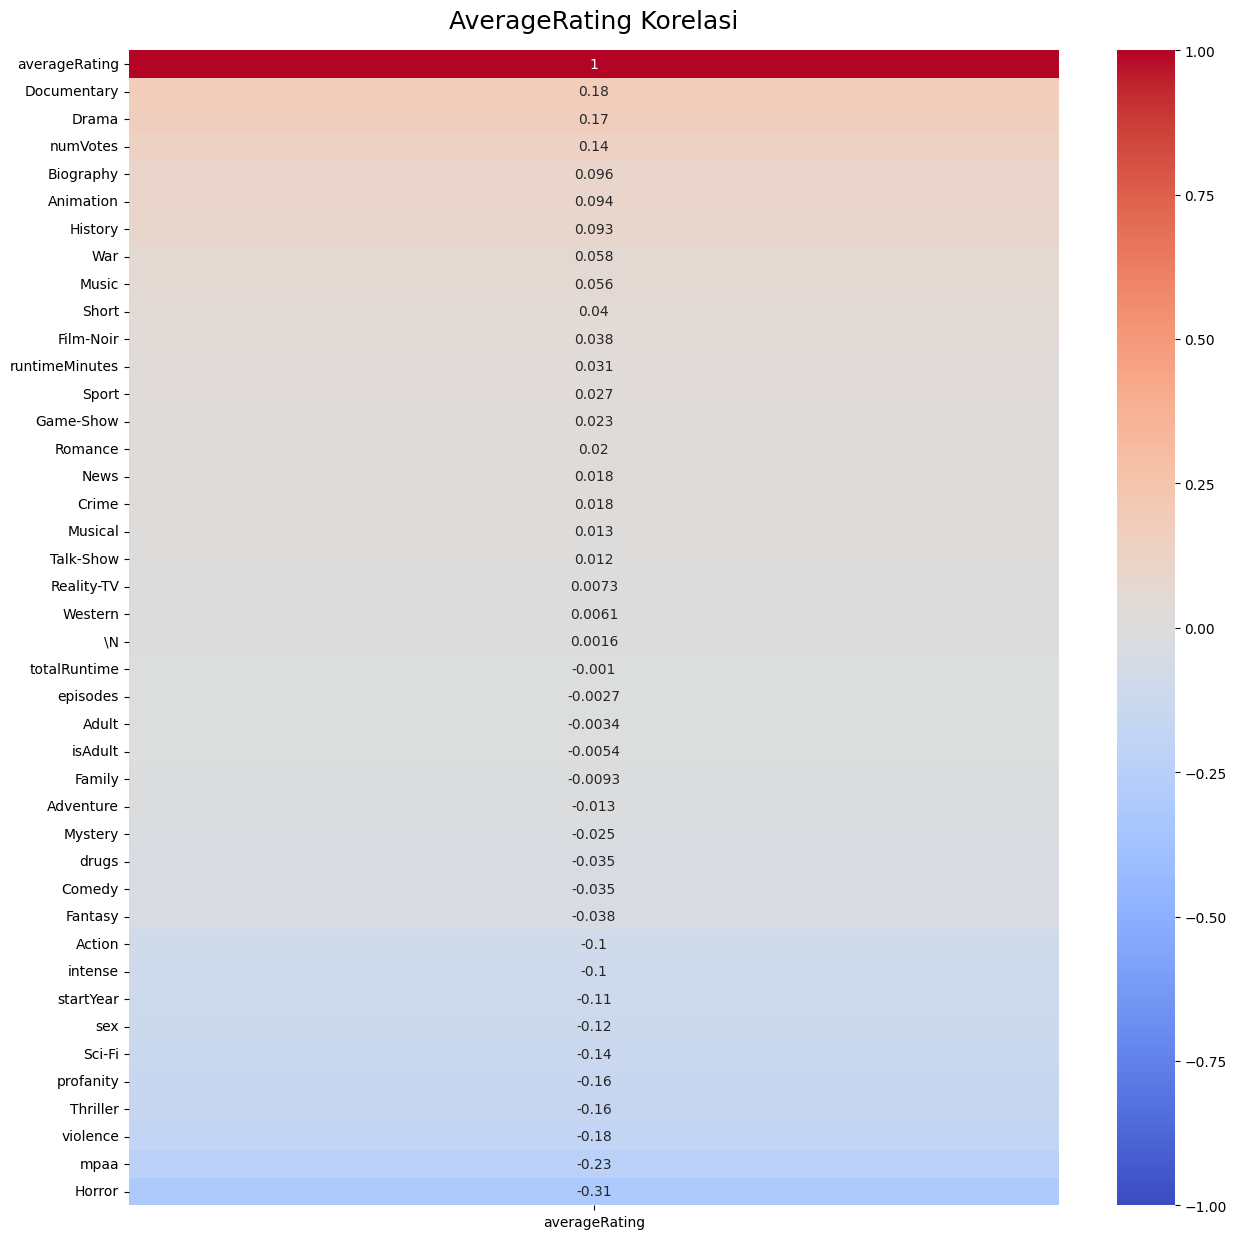

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df4=df3.drop(columns=['tconst', 'titleType', 'primaryTitle', 'originalTitle'])
corrmat= df4.corr()[['averageRating']].sort_values(by='averageRating', ascending=False)
plt.figure(figsize=(15,15))
heatmap= sns.heatmap(corrmat, vmin=-1, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('AverageRating Korelasi', fontdict={'fontsize':18}, pad=16);

In [ ]:
X=df4.drop(columns=['averageRating'])
#kolom=['numVotes']
#X=X[kolom]
y=df4['averageRating']

In [ ]:
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler object
scaler = StandardScaler()
normalisasi= scaler.fit_transform(X[['numVotes']])
normalisasi =pd.DataFrame(normalisasi, columns=X[['numVotes']].columns)
X.loc[:,'numVotes']=normalisasi['numVotes'].values
X

,isAdult,startYear,runtimeMinutes,totalRuntime,episodes,numVotes,sex,violence,profanity,drugs,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,\N
0,0,1994,142.0,142.0,1,31.721635,1,2,3,1,...,0,0,0,0,0,0,0,0,0,0
1,0,2008,152.0,152.0,1,31.404434,0,2,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,2010,148.0,148.0,1,27.823567,0,2,1,1,...,0,0,1,0,0,0,0,0,0,0
3,0,1999,139.0,139.0,1,25.114148,2,3,3,2,...,0,0,0,0,0,0,0,0,0,0
4,0,1994,142.0,142.0,1,24.560008,2,2,2,2,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45499,0,2022,125.0,125.0,1,-0.254177,1,1,1,1,...,0,1,0,0,0,0,0,0,0,0
45500,0,2012,4.0,4.0,1,-0.254177,0,2,0,1,...,0,0,0,0,0,0,0,0,0,0
45501,0,2014,147.0,147.0,1,-0.254177,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
45502,0,2016,114.0,114.0,1,-0.254177,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
from sklearn.model_selection import RepeatedKFold, cross_val_score
rkf=RepeatedKFold(n_repeats=3, n_splits=8, random_state=1)
for i, (train_index, test_index) in enumerate(rkf.split(X, y)):
    print(f"Fold {i}:")
    print(f"  Train: {len(train_index)}")
    print(f"  Test: {len(test_index)}")

Fold 0:
  Train: 39816
  Test: 5688
Fold 1:
  Train: 39816
  Test: 5688
Fold 2:
  Train: 39816
  Test: 5688
Fold 3:
  Train: 39816
  Test: 5688
Fold 4:
  Train: 39816
  Test: 5688
Fold 5:
  Train: 39816
  Test: 5688
Fold 6:
  Train: 39816
  Test: 5688
Fold 7:
  Train: 39816
  Test: 5688
Fold 8:
  Train: 39816
  Test: 5688
Fold 9:
  Train: 39816
  Test: 5688
Fold 10:
  Train: 39816
  Test: 5688
Fold 11:
  Train: 39816
  Test: 5688
Fold 12:
  Train: 39816
  Test: 5688
Fold 13:
  Train: 39816
  Test: 5688
Fold 14:
  Train: 39816
  Test: 5688
Fold 15:
  Train: 39816
  Test: 5688
Fold 16:
  Train: 39816
  Test: 5688
Fold 17:
  Train: 39816
  Test: 5688
Fold 18:
  Train: 39816
  Test: 5688
Fold 19:
  Train: 39816
  Test: 5688
Fold 20:
  Train: 39816
  Test: 5688
Fold 21:
  Train: 39816
  Test: 5688
Fold 22:
  Train: 39816
  Test: 5688
Fold 23:
  Train: 39816
  Test: 5688


In [ ]:
from sklearn.linear_model import  Lasso
alpha=0.001
lasso_reg=Lasso(alpha=alpha)
r2= cross_val_score(lasso_reg, X, y, scoring='r2', cv=rkf, n_jobs=-1)
r2=np.mean(r2)
print("Nilai R-squared: %0.4f" %r2)

Nilai R-squared: 0.2668


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
# Splitting dataset ke dalam train dan test set
X_train, X_test, y_train, y_test = train_test_split(X[['numVotes']],  y, test_size=0.2, random_state=2023)
# Train an MLPRegressor model
regressor = MLPRegressor(learning_rate_init =0.001, alpha=0.01, hidden_layer_sizes=(100,100,50, 50),
                         activation='relu', solver='adam', max_iter=100, random_state=2023, verbose=True)
regressor.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error on test set: {:.2f}".format(mse))
print("R2 score on test set: {:.2f}".format(r2))

Iteration 1, loss = 3.56693765
Iteration 2, loss = 0.75098190
Iteration 3, loss = 0.74928561
Iteration 4, loss = 0.74774072
Iteration 5, loss = 0.74675445
Iteration 6, loss = 0.74591854
Iteration 7, loss = 0.75173640
Iteration 8, loss = 0.75382367
Iteration 9, loss = 0.75122650
Iteration 10, loss = 0.74692014
Iteration 11, loss = 0.75098543
Iteration 12, loss = 0.74471274
Iteration 13, loss = 0.74580324
Iteration 14, loss = 0.74658724
Iteration 15, loss = 0.74469255
Iteration 16, loss = 0.74859904
Iteration 17, loss = 0.74825691
Iteration 18, loss = 0.74761393
Iteration 19, loss = 0.74613887
Iteration 20, loss = 0.74908164
Iteration 21, loss = 0.74577756
Iteration 22, loss = 0.74813549
Iteration 23, loss = 0.75026745
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Mean squared error on test set: 1.53
R2 score on test set: 0.03


In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
# Splitting dataset ke dalam train dan test set
X_train, X_test, y_train, y_test = train_test_split(X,  y, test_size=0.2, random_state=2023)
# Train an MLPRegressor model
regressor = MLPRegressor(learning_rate_init =0.001, alpha=0.01, hidden_layer_sizes=(100,100,50, 50),
                         activation='relu', solver='adam', max_iter=23, random_state=2023, verbose=True)
regressor.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error on test set: {:.2f}".format(mse))
print("R2 score on test set: {:.2f}".format(r2))

Iteration 1, loss = 6803.25977072
Iteration 2, loss = 203.05681231
Iteration 3, loss = 282.26204505
Iteration 4, loss = 1104.12260293
Iteration 5, loss = 4877.89874913
Iteration 6, loss = 673.71146764
Iteration 7, loss = 1.87108116
Iteration 8, loss = 1.62878683
Iteration 9, loss = 1.45317353
Iteration 10, loss = 1.30553931
Iteration 11, loss = 1.38272945
Iteration 12, loss = 2.62166204
Iteration 13, loss = 1.45799502
Iteration 14, loss = 1.64831673
Iteration 15, loss = 0.96608507
Iteration 16, loss = 0.93902011
Iteration 17, loss = 0.94418529
Iteration 18, loss = 10.46276424
Iteration 19, loss = 3.20030554
Iteration 20, loss = 1.32773897
Iteration 21, loss = 2.30021926
Iteration 22, loss = 9.73882137
Iteration 23, loss = 0.69558344


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (23) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean squared error on test set: 1.44
R2 score on test set: 0.09


### 3. Lakukan _clustering_ pada _dataset_, dan berikan analisis dari jenis-jenis suatu judul yang terdapat dalam suatu _cluster_!

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering

In [ ]:
df2 = pd.read_csv('https://raw.githubusercontent.com/determinedguy/aids-dataset-even-2023/main/project/imdbparentalguide_rev01_filled.csv')
df2.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,totalRuntime,genres,episodes,averageRating,numVotes,sex,violence,profanity,drugs,intense,mpaa
0,tt0111161,movie,The Shawshank Redemption,The Shawshank Redemption,0,1994,142.0,142.0,Drama,1,9.3,2684158,Mild,Moderate,Severe,Mild,Moderate,Rated R
1,tt0468569,movie,The Dark Knight,The Dark Knight,0,2008,152.0,152.0,"Action,Crime,Drama",1,9.0,2657541,None,Moderate,Mild,Mild,Severe,Rated PG-13
2,tt1375666,movie,Inception,Inception,0,2010,148.0,148.0,"Action,Adventure,Sci-Fi",1,8.8,2357063,None,Moderate,Mild,Mild,Moderate,Rated PG-13
3,tt0137523,movie,Fight Club,Fight Club,0,1999,139.0,139.0,Drama,1,8.8,2129710,Moderate,Severe,Severe,Moderate,Severe,Rated R
4,tt0109830,movie,Forrest Gump,Forrest Gump,0,1994,142.0,142.0,"Drama,Romance",1,8.8,2083211,Moderate,Moderate,Moderate,Moderate,Moderate,Rated PG-13


In [ ]:
df2.drop(columns=['tconst', 'primaryTitle', 'originalTitle', 'startYear'], inplace=True)
df2.head()

,titleType,isAdult,runtimeMinutes,totalRuntime,genres,episodes,averageRating,numVotes,sex,violence,profanity,drugs,intense,mpaa
0,movie,0,142.0,142.0,Drama,1,9.3,2684158,Mild,Moderate,Severe,Mild,Moderate,Rated R
1,movie,0,152.0,152.0,"Action,Crime,Drama",1,9.0,2657541,None,Moderate,Mild,Mild,Severe,Rated PG-13
2,movie,0,148.0,148.0,"Action,Adventure,Sci-Fi",1,8.8,2357063,None,Moderate,Mild,Mild,Moderate,Rated PG-13
3,movie,0,139.0,139.0,Drama,1,8.8,2129710,Moderate,Severe,Severe,Moderate,Severe,Rated R
4,movie,0,142.0,142.0,"Drama,Romance",1,8.8,2083211,Moderate,Moderate,Moderate,Moderate,Moderate,Rated PG-13


In [ ]:
df2.drop(columns=['titleType', 'genres'], inplace=True)

In [ ]:
df2.isnull().sum()

isAdult           0
runtimeMinutes    0
totalRuntime      0
episodes          0
averageRating     0
numVotes          0
sex               0
violence          0
profanity         0
drugs             0
intense           0
mpaa              0
dtype: int64

In [ ]:
# Menghitung jumlah outliers tiap atribut
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1
print(((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))).sum())

averageRating     1298
drugs                0
episodes          7016
intense              0
isAdult              6
mpaa                 0
numVotes          7007
profanity            0
runtimeMinutes    5886
sex                  0
totalRuntime      6965
violence             0
dtype: int64


<ipython-input-9-00608a4c60a5>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df2.quantile(0.25)
<ipython-input-9-00608a4c60a5>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df2.quantile(0.75)
<ipython-input-9-00608a4c60a5>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  print(((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))).sum())


In [ ]:
from sklearn.preprocessing import MinMaxScaler

numerical_columns = ['runtimeMinutes', 'totalRuntime', 'episodes',	'averageRating', 'numVotes']
scaler = MinMaxScaler()
df_std = pd.DataFrame(scaler.fit_transform(df2[numerical_columns]), columns=numerical_columns)
# df_std['Gender'] = df['Gender']  # Membiarkan dulu atribut kategorikal
df_std.head()
# df2_new = pd.DataFrame(scaler.fit_transform(df2_new[numerical_columns]), columns=numerical_columns)
# # df_std = pd.DataFrame(scaler.fit_transform(df2[numerical_columns]), columns=numerical_columns)
# df2_new[numerical_columns] = df_std[numerical_columns]
# df_std.head()

,runtimeMinutes,totalRuntime,episodes,averageRating,numVotes
0,0.102248,0.000103,0.0,0.943182,1.000000
1,0.109500,0.000111,0.0,0.909091,0.990080
2,0.106599,0.000108,0.0,0.886364,0.878093
3,0.100073,0.000101,0.0,0.886364,0.793360
4,0.102248,0.000103,0.0,0.886364,0.776030


In [ ]:
list_categorical = ['sex', 'violence', 'profanity', 'drugs', 'intense']
list_categorical_encode = ['sex_encode', 'violence_encode', 'profanity_encode', 'drugs_encode', 'intense_encode']

In [ ]:
for i in range(5):
  encode_map = {'None':0, 'Mild':1, 'Moderate':2, 'Severe':3}
  df_std[list_categorical_encode[i]] = df2[list_categorical[i]].map(encode_map)

In [ ]:
mpaa_encode = {'Rated G':0, 'Rated PG': 1, 'Rated PG-13':2, 'Rated R':3, 'Rated NC-17':4}
df_std['mpaa_encode'] = df2['mpaa'].map(mpaa_encode)

In [ ]:
df_std.head()

,runtimeMinutes,totalRuntime,episodes,averageRating,numVotes,sex_encode,violence_encode,profanity_encode,drugs_encode,intense_encode,mpaa_encode
0,0.102248,0.000103,0.0,0.943182,1.000000,1,2,3,1,2,3
1,0.109500,0.000111,0.0,0.909091,0.990080,0,2,1,1,3,2
2,0.106599,0.000108,0.0,0.886364,0.878093,0,2,1,1,2,2
3,0.100073,0.000101,0.0,0.886364,0.793360,2,3,3,2,3,3
4,0.102248,0.000103,0.0,0.886364,0.776030,2,2,2,2,2,2


Text(0.5, 1.0, 'Correlation matrix')

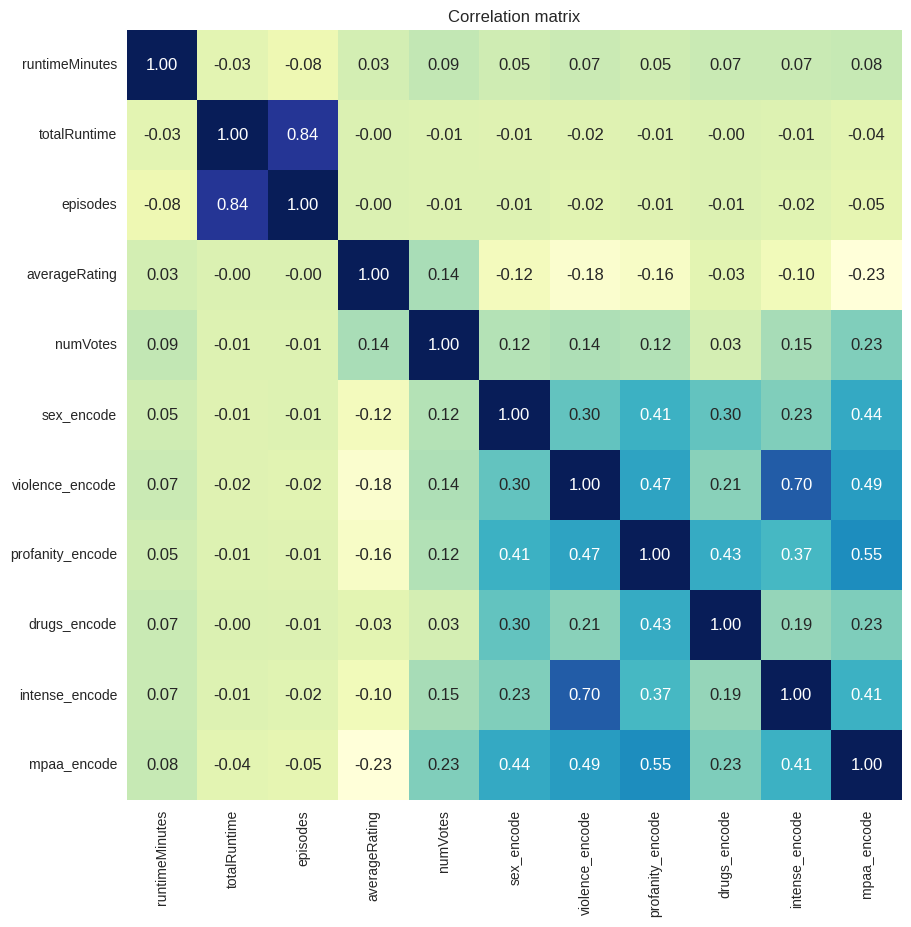

In [ ]:
plt.figure(figsize=(10,10))

sns.heatmap(df_std.select_dtypes(np.number).corr(),
        annot=True,
        cbar=False,
        fmt="0.2f",
        cmap="YlGnBu",
        xticklabels=df_std.select_dtypes(np.number).columns,
        yticklabels=df_std.select_dtypes(np.number).columns)
plt.title("Correlation matrix")

In [ ]:
df_cluster =  pd.DataFrame(df_std[['runtimeMinutes','numVotes']].copy())

In [ ]:
df_cluster.head()

,runtimeMinutes,numVotes
0,0.102248,1.000000
1,0.109500,0.990080
2,0.106599,0.878093
3,0.100073,0.793360
4,0.102248,0.776030


In [ ]:
def compute_silhouette_coef(df: pd.DataFrame, k_lower: int, k_upper: int):
    print("Komparasi silhouette coefficient untuk k berbeda:")
    print("=================================================")
    for k in [*range(k_lower, k_upper+1)]:
        # Mendefinisikan model K-Means dengan nilai k tertentu
        clusterer = KMeans(n_clusters = k)

        # Menghitung sihouette_score untuk mengukur seberapa baik klaster yang terbentuk.
        cluster_labels = clusterer.fit_predict(df)
        silhouette_avg = silhouette_score(df, cluster_labels)
        print(
            f"Untuk k = {k}, rata-rata silhouette_coefficient adalah: {silhouette_avg}"
        )

In [ ]:
compute_silhouette_coef(df_cluster, 2, 6)

Komparasi silhouette coefficient untuk k berbeda:


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Untuk k = 2, rata-rata silhouette_coefficient adalah: 0.8435940712576783


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Untuk k = 3, rata-rata silhouette_coefficient adalah: 0.833199249016042


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Untuk k = 4, rata-rata silhouette_coefficient adalah: 0.5299836082070445


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Untuk k = 5, rata-rata silhouette_coefficient adalah: 0.5582420565463144


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Untuk k = 6, rata-rata silhouette_coefficient adalah: 0.5647796471603223


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

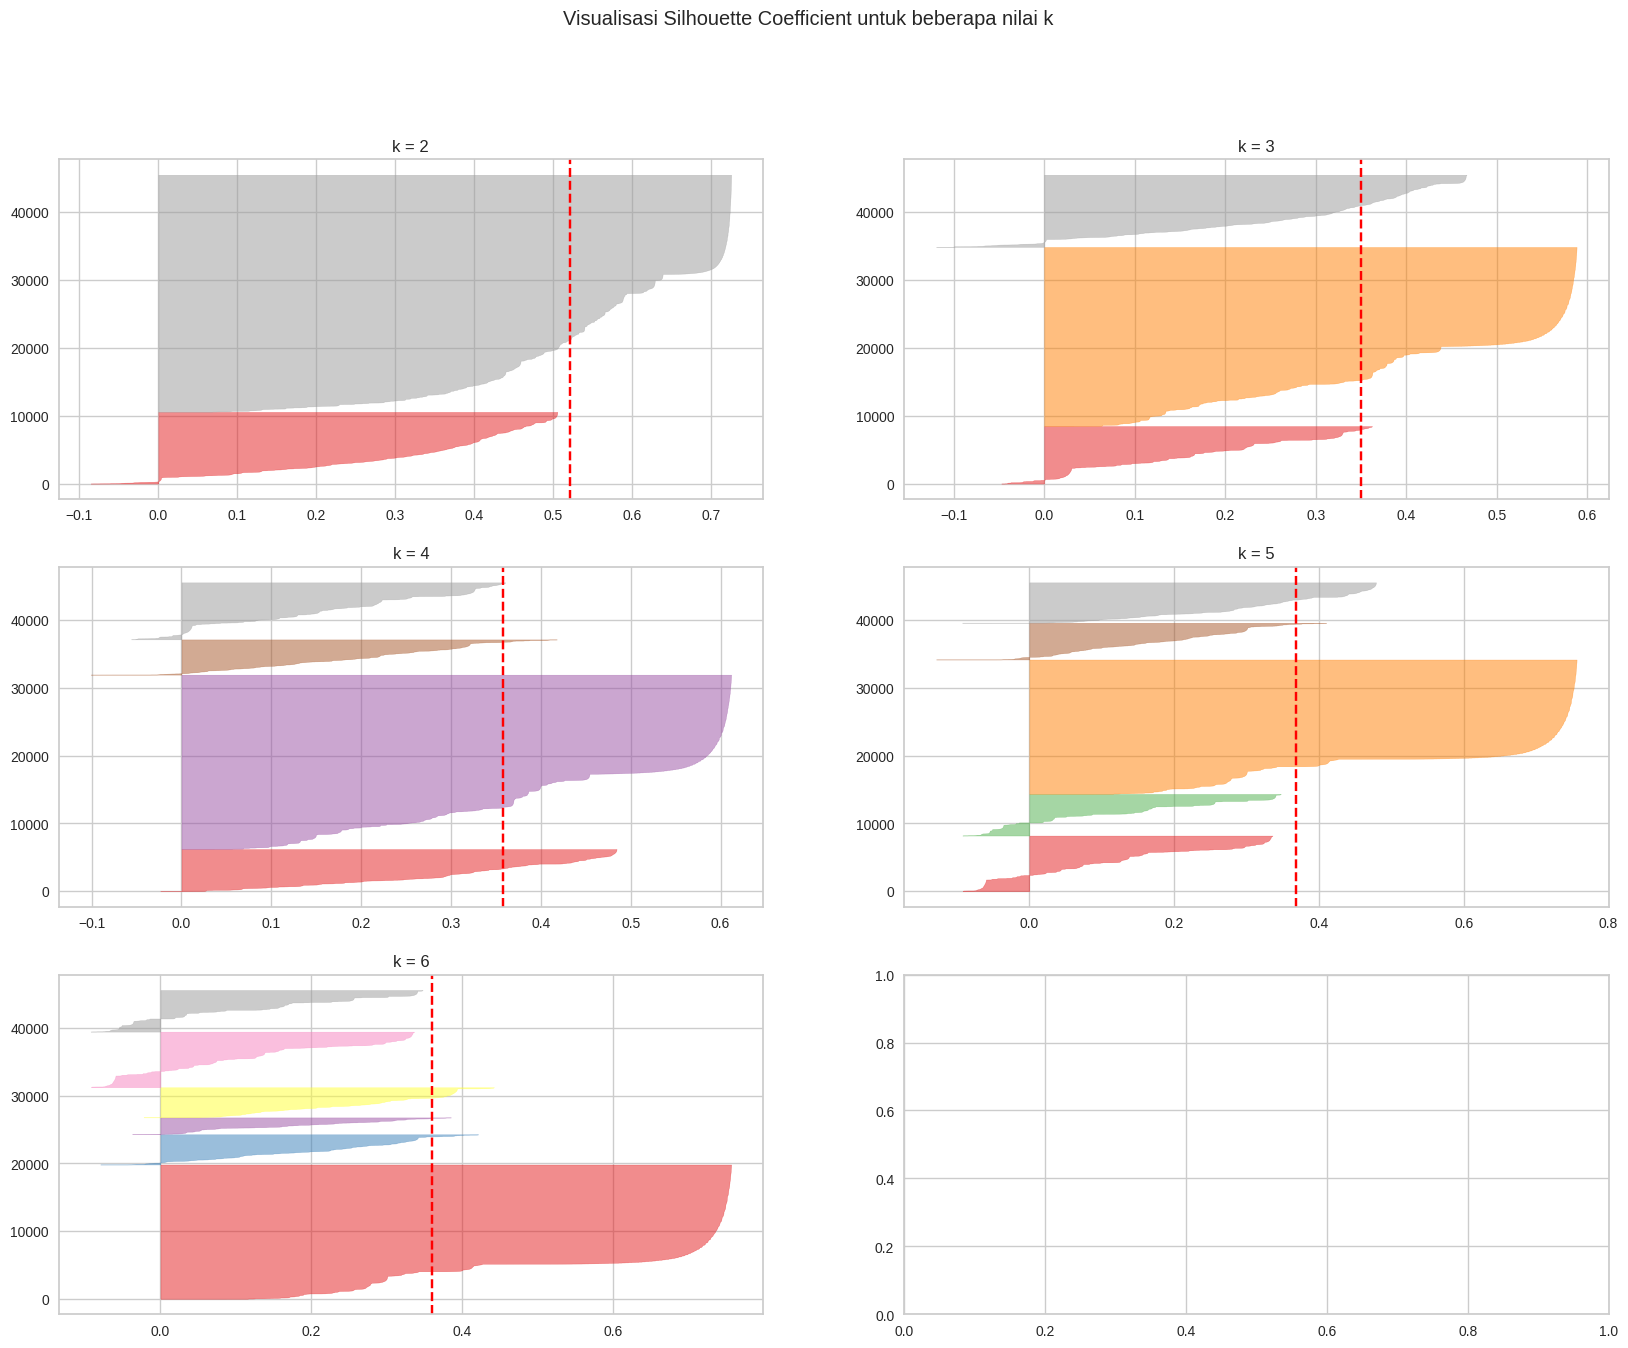

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(20,15))
fig.suptitle("Visualisasi Silhouette Coefficient untuk beberapa nilai k")
for k in [2, 3, 4, 5, 6]:
    # Mendefinisikan model K-Means dengan nilai k tertentu
    clusterer = KMeans(n_clusters=k)

    # Memvisualisasikan densitas tiap klaster yang terbentuk
    q, mod = divmod(k, 2)
    ax[q-1][mod].set_title(f"k = {k}")
    visualizer = SilhouetteVisualizer(clusterer, ax = ax[q-1][mod])
    visualizer.fit(df_cluster)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

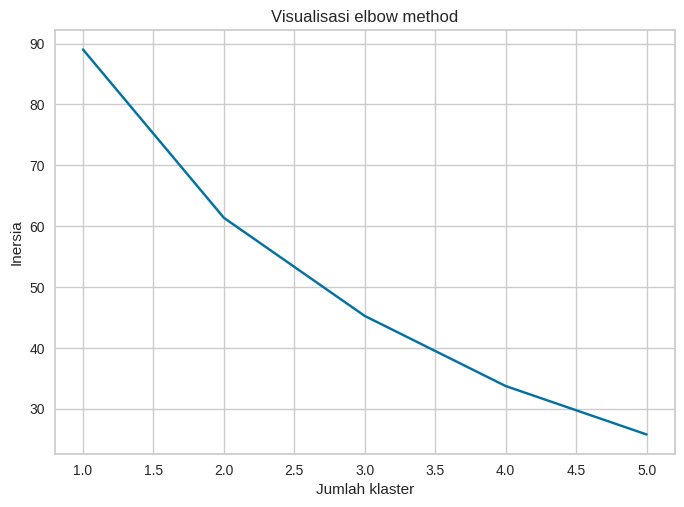

In [ ]:
inertia = []
for cluster in range(1, 6):
    km = KMeans(n_clusters=cluster)
    km = km.fit(df_cluster)
    inertia.append(km.inertia_)

plt.plot(range(1, 6), inertia, 'bx-')
plt.xlabel('Jumlah klaster')
plt.ylabel('Inersia')
plt.title('Visualisasi elbow method')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2)
cluster_assignment = kmeans.fit_predict(df_cluster)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df_with_clusters = pd.DataFrame(df_cluster.copy())
df_with_clusters['klaster'] = cluster_assignment
df_with_clusters.head()

,runtimeMinutes,numVotes,klaster
0,0.102248,1.000000,1
1,0.109500,0.990080,1
2,0.106599,0.878093,1
3,0.100073,0.793360,1
4,0.102248,0.776030,1


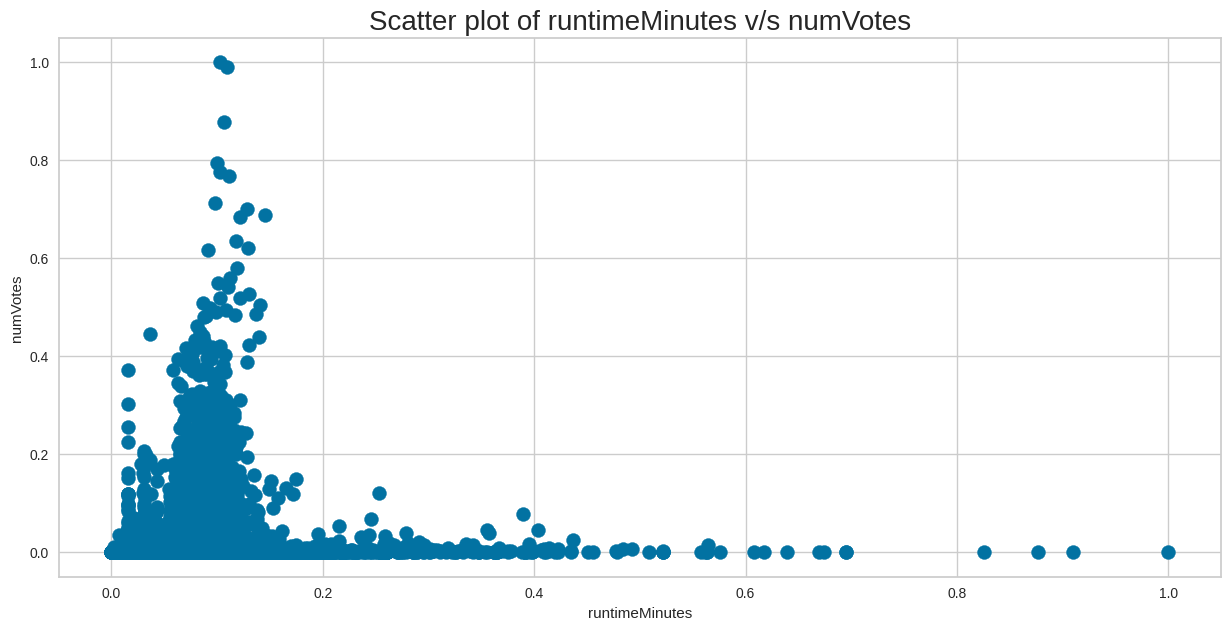

In [ ]:
plt.figure(1 , figsize = (15 , 7))
plt.title('Scatter plot of runtimeMinutes v/s numVotes', fontsize = 20)
plt.xlabel('runtimeMinutes')
plt.ylabel('numVotes')
plt.scatter( x = 'runtimeMinutes', y = 'numVotes', data = df_cluster, s = 100)
plt.show()

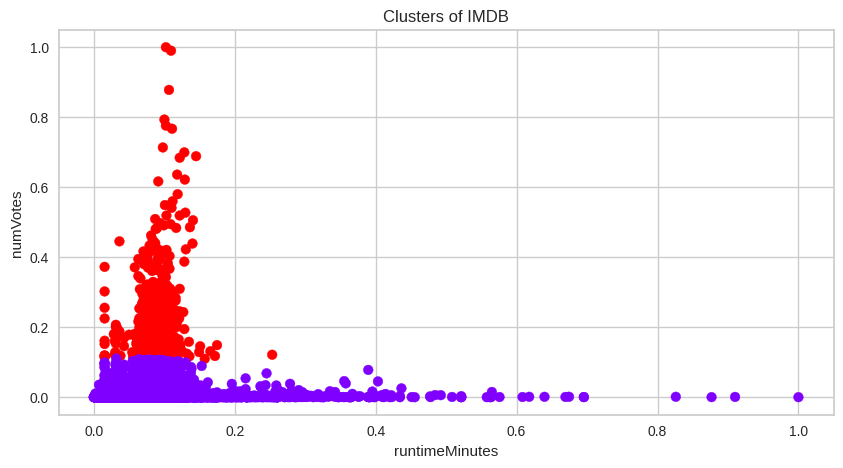

In [ ]:
# Create figure
fig = plt.figure(figsize = (10, 5))
ax = plt.axes()

# Prepare data
x = df_with_clusters['runtimeMinutes']
y = df_with_clusters['numVotes']
cluster = df_with_clusters['klaster']

# Create plot
ax.scatter(x, y, c = cluster, cmap = "rainbow")
plt.title("Clusters of IMDB")
ax.set_xlabel('runtimeMinutes')
ax.set_ylabel('numVotes')

# Show plot
plt.show()